# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
from getMatchData import get_match_data
import numpy as np
import pandas as pd
import getPlayersData as gpd
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data

In [2]:
# match_data = get_match_data()
match_data = pd.read_csv("csv_files/Match Data 20221118.csv")

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
match_data.tail()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
147643,ESPORTSTMNT03_3061626,complete,NaN,NEXO,2023,Split 1,0,2022-11-17 18:02:51,1,12.21,8,Red,mid,Quetz,oe:player:d1abf60b73ebffc520bc33915ff22e0,Phlox Gaming,oe:team:c20f8549c29d0dd0bb92d7aa8028547,Ahri,Aatrox,Seraphine,Syndra,Fiora,Jax,1934,0,1,4,2,9,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2792,0.8997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,12616.0,391.3961,0.197375,668.8418,321.0031,4.0,0.1241,3.0,0.0931,3.0,20.0,0.6205,10750,6529.0,202.5543,0.197914,9325.0,NaN,243.0,243.0,0.0,NaN,NaN,7.5388,3240.0,4790.0,89.0,3232.0,4735.0,82.0,8.0,55.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,5094.0,7482.0,135.0,5585.0,7682.0,131.0,-491.0,-200.0,4.0,0.0,1.0,1.0,2.0,0.0,0.0
147644,ESPORTSTMNT03_3061626,complete,NaN,NEXO,2023,Split 1,0,2022-11-17 18:02:51,1,12.21,9,Red,bot,Kodo,oe:player:9bc6f23d0cb954b0fd8208b469b5433,Phlox Gaming,oe:team:c20f8549c29d0dd0bb92d7aa8028547,Sivir,Aatrox,Seraphine,Syndra,Fiora,Jax,1934,0,2,4,4,9,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2792,0.8997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,7491.0,232.3992,0.117195,531.6856,231.5305,10.0,0.3102,5.0,0.1551,4.0,16.0,0.4964,12028,7807.0,242.2027,0.236654,11550.0,NaN,281.0,249.0,32.0,NaN,NaN,8.7177,2589.0,2486.0,58.0,3272.0,3663.0,87.0,-683.0,-1177.0,-29.0,0.0,0.0,0.0,0.0,0.0,0.0,4807.0,4534.0,113.0,5166.0,5750.0,136.0,-359.0,-1216.0,-23.0,1.0,0.0,0.0,0.0,1.0,1.0
147645,ESPORTSTMNT03_3061626,complete,NaN,NEXO,2023,Split 1,0,2022-11-17 18:02:51,1,12.21,10,Red,sup,ElTrabuc,oe:player:badd861879d7e0f306338ec57318a06,Phlox Gaming,oe:team:c20f8549c29d0dd0bb92d7aa8028547,Yuumi,Aatrox,Seraphine,Syndra,Fiora,Jax,1934,0,1,2,5,9,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2792,0.8997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,13730.0,425.9566,0.214803,204.7880,114.6019,31.0,0.9617,7.0,0.2172,6.0,62.0,1.9235,7181,2960.0,91.8304,0.089728,6100.0,NaN,9.0,9.0,0.0,NaN,NaN,0.2792,2163.0,2226.0,2.0,1967.0,2280.0,5.0,196.0,-54.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,3184.0,3832.0,2.0,2933.0,4002.0,10.0,251.0,-170.0,-8.0,0.0,1.0,0.0,0.0,0.0,0.0
147646,ESPORTSTMNT03_3061626,complete,NaN,NEXO,2023,Split 1,0,2022-11-17 18:02:51,1,12.21,100,Blue,team,NaN,NaN,Stormbringers,oe:team:b469fd5f0912d223dd70c3bbb5ddcb9,NaN,Viktor,Caitlyn,Heimerdinger,Sylas,Akali,1934,1,20,9,47,20,9,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.6205,0.8997,1.0,2.0,3.0,2.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,7.0,4.0,1.0,0.0,2.0,7.0,1.0,0.0,70855.0,2198.1903,NaN,2761.3340,2750.5688,82.0,2.5440,42.0,1.3030,31.

## Initial Exploration with info() and describe() function

In [5]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147648 entries, 0 to 147647
Columns: 123 entries, gameid to opp_deathsat15
dtypes: float64(93), int64(12), object(18)
memory usage: 138.6+ MB


In [6]:
match_data.describe()

,year,playoffs,game,patch,participantid,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
count,147648.000000,147648.000000,147648.000000,147540.000000,147648.000000,147648.000000,147648.000000,147648.000000,147648.000000,147648.000000,147648.000000,147648.000000,126744.000000,126744.000000,126744.000000,126744.000000,130226.000000,123030.000000,105620.000000,105620.000000,147648.000000,147648.000000,21124.000000,24608.000000,24608.000000,21036.000000,21036.000000,21124.000000,21124.000000,21124.000000,21124.000000,21036.000000,21036.000000,4138.000000,21124.000000,21124.000000,21124.000000,21124.000000,21124.000000,21124.000000,126518.000000,126518.000000,21124.000000,24608.000000,24608.000000,21120.000000,21124.000000,21036.000000,21036.000000,126956.000000,126956.000000,147636.000000,147636.000000,123030.000000,147636.000000,126744.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147648.000000,147646.000000,147646.000000,123040.000000,147636.000000,24606.000000,123040.000000,144154.000000,147636.000000,21420.000000,21420.000000,144164.000000,126744.000000,126744.000000,126744.000000,126744.000000,126744.000000,126744.000000,126744.000000,126744.000000,126744.000000,126744.000000,126744.000000,126744.000000,126744.000000,126744.000000,126744.000000,126744.000000,126744.000000,126744.000000,126744.000000,126744.000000,126744.000000,126744.000000,126744.000000,126744.000000,126744.000000,126744.000000,126744.000000,126744.000000,126744.000000,126744.000000
mean,2022.025764,0.169132,1.508371,12.087394,29.583333,1895.590621,0.499919,4.822537,4.832195,10.759672,14.467612,14.496586,0.562851,0.102001,0.017279,0.003219,0.291639,0.099967,0.143278,0.100000,0.465518,0.931034,0.499905,2.235899,2.235899,2.194143,2.194143,0.438222,0.432541,0.434908,0.432352,0.026383,0.429644,2.202030,0.053683,0.053683,0.499858,0.986698,0.986698,0.473679,0.239547,0.239547,0.500000,6.043929,6.043929,0.500000,0.499905,4.695237,4.695237,0.326562,0.326562,22210.136207,696.494161,0.200000,977.480868,867.867503,32.378715,1.012166,14.544068,0.450093,12.437847,74.946016,2.335864,18975.369148,12070.965126,382.544508,0.200000,17561.993701,0.000000,199.117848,254.543169,66.224004,43.596312,6.084174,10.049397,5229.898441,6066.528483,104.853169,5229.898441,6066.528483,104.853169,0.000000,0.000000,0.000000,0.727782,1.112731,0.730275,0.727782,1.112731,0.730275,8276.139084,9803.583460,167.529114,8276.139084,9803.583460,167.529114,0.000000,0.000000,0.000000,1.357382,2.194597,1.360743,1.357382,2.194597,1.360743
std,0.158431,0.374870,0.882443,0.053822,57.650663,337.967516,0.500002,5.856176,5.604699,12.774367,7.519236,7.517776,1.027591,0.349519,0.136287,0.056924,0.454519,0.299958,0.350358,0.300001,0.258326,0.305634,0.500012,1.374098,1.374098,1.331220,1.331220,0.705863,0.698666,0.704558,0.705258,0.201770,0.700941,1.343487,0.238063,0

In [7]:
match_data.playername.value_counts()

unknown player    2085
Wei                156
Xiaohu             156
GALA               156
Ming               156
                  ... 
Pier0                1
Scott                1
Navatar              1
Natur3               1
D4rkzelda            1
Name: playername, Length: 3771, dtype: int64

In [8]:
match_data[match_data["playername"] == "Adept"].result.value_counts()

0    35
1    18
Name: result, dtype: int64

In [9]:
def calculate_win_percentage(player_data):
    total_games = len(player_data)
    total_wins = len(player_data[player_data.result == 1])
    return (total_wins / total_games) * 100

In [10]:
calculate_win_percentage(match_data[match_data["playername"] == "Adept"])

33.9622641509434

In [11]:
match_data[["gameid", "teamid", "playerid", "position"]].values

array([['ESPORTSTMNT01_2690210',
        'oe:team:68911b3329146587617ab2973106e23',
        'oe:player:38e0af7278d6769d0c81d7c4b47ac1e', 'top'],
       ['ESPORTSTMNT01_2690210',
        'oe:team:68911b3329146587617ab2973106e23',
        'oe:player:637ed20b1e41be1c51bd1a4cb211357', 'jng'],
       ['ESPORTSTMNT01_2690210',
        'oe:team:68911b3329146587617ab2973106e23',
        'oe:player:d1ae0e2f9f3ac1e0e0cdcb86504ca77', 'mid'],
       ...,
       ['ESPORTSTMNT03_3061626',
        'oe:team:c20f8549c29d0dd0bb92d7aa8028547',
        'oe:player:badd861879d7e0f306338ec57318a06', 'sup'],
       ['ESPORTSTMNT03_3061626',
        'oe:team:b469fd5f0912d223dd70c3bbb5ddcb9', nan, 'team'],
       ['ESPORTSTMNT03_3061626',
        'oe:team:c20f8549c29d0dd0bb92d7aa8028547', nan, 'team']],
      dtype=object)

In [12]:
def invalid_games_checker(invalid_str="NA"):
    
    # Check if "NA" is present
    flag = False
    for element in match_data[["gameid", "teamid", "playerid", "position"]].values:
        for item in element:
            if not isinstance(item, float):
                if invalid_str in item:
                    flag = True
                    if invalid_str:
                        pprint(f"Has {invalid_str}")
                    else:
                        pprint("Has empty string")
                    break
        if flag:
            break

In [13]:
# check NA
invalid_games_checker(invalid_str="NA")

# check empty string
invalid_games_checker(invalid_str="")

# check nan
invalid_games_checker(invalid_str="nan")

# check null
invalid_games_checker(invalid_str="null")



'Has NA'
'Has empty string'


In [14]:
match_data.shape

(147648, 123)

# Cleaning and formatting data

In [15]:
invalid_game_ids = []

# removing the invalid game data for invalid game ids
for gid in match_data.gameid.values:
    if not isinstance(gid, float):
        if "NA" in gid:
            invalid_game_ids.append(gid)

match_data = match_data[~match_data["gameid"].isin(invalid_game_ids)].copy()

In [16]:
match_data.shape

(139008, 123)

In [17]:
# First removing the data that has empty, nan or null string
format_dict = {
    "": np.nan, 
    "nan": np.nan, 
    "null":np.nan
}

# convert all to str
match_data["gameid"] = match_data["gameid"].str.strip()
match_data["teamid"] = match_data["teamid"].str.strip()
match_data["playerid"] = match_data["playerid"].str.strip()

# replace the invalid values to np.nan
# https://sparkbyexamples.com/pandas/pandas-remap-values-in-column-with-a-dictionary-dict/#:~:text=Using%20Pandas%20DataFrame.-,replace(),regular%20expressions%20for%20regex%20substitutions.
match_data = match_data.replace({
    "gameid": format_dict,
    "teamid": format_dict,
    "playerid": format_dict,
    "position": format_dict
})

In [18]:
match_data.shape

(139008, 123)

In [19]:
# Drop nan value
match_data = match_data[match_data.gameid.notna()]
match_data = match_data[match_data.position.notna()]

In [20]:
match_data.shape

(139008, 123)

In [21]:
# Drop duplicates if any
match_data = match_data.drop_duplicates()

In [22]:
match_data.shape

(139008, 123)

- There are no duplicates

# Separating players data from match data

In [23]:
# look into the dataframe for features
player_data = match_data[match_data["position"] != "team"]
player_data.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,1,Blue,top,Soboro,oe:player:38e0af7278d6769d0c81d7c4b47ac1e,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,Renekton,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,2,3,2,9,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3152,0.9807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,15768.0,552.2942,0.278784,1072.3993,777.7933,8.0,0.2802,6.0,0.2102,5.0,26.0,0.9107,10934,7164.0,250.9282,0.253859,10275.0,NaN,231.0,220.0,11.0,NaN,NaN,8.0911,3228.0,4909.0,89.0,3176.0,4953.0,81.0,52.0,-44.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,5025.0,7560.0,135.0,4634.0,7215.0,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,2,Blue,jng,Raptor,oe:player:637ed20b1e41be1c51bd1a4cb211357,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,Xin Zhao,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,2,5,6,9,19,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.3152,0.9807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,11765.0,412.0841,0.208009,944.2732,650.1576,6.0,0.2102,18.0,0.6305,6.0,48.0,1.6813,9138,5368.0,188.0210,0.190220,8750.0,NaN,148.0,33.0,115.0,NaN,NaN,5.1839,3429.0,3484.0,58.0,2944.0,3052.0,63.0,485.0,432.0,-5.0,1.0,2.0,0.0,0.0,0.0,1.0,5366.0,5320.0,89.0,4825.0,5595.0,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,3,Blue,mid,Feisty,oe:player:d1ae0e2f9f3ac1e0e0cdcb86504ca77,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,LeBlanc,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,2,2,3,9,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3152,0.9807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,14258.0,499.4046,0.252086,581.6462,227.7758,19.0,0.6655,7.0,0.2452,7.0,29.0,1.0158,9715,5945.0,208.2312,0.210665,8725.0,NaN,193.0,177.0,16.0,NaN,NaN,6.7601,3283.0,4556.0,81.0,3121.0,4485.0,81.0,162.0,71.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5118.0,6942.0,120.0,5593.0,6789.0,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,4,Blue,bot,Gamin,oe:player:998b3e49b01ecc41eacc392477a98cf,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,Samira,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,2,4,2,9,19,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.3152,0.9807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.

In [24]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115840 entries, 0 to 147645
Columns: 123 entries, gameid to opp_deathsat15
dtypes: float64(93), int64(12), object(18)
memory usage: 109.6+ MB


In [25]:
player_data.date.values
pprint(type(player_data.date.values[0]))

<class 'str'>


In [26]:
# Format date according to datetime
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
# https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/
player_data = player_data.astype({"date": "datetime64"})

In [27]:
pprint(type(player_data.date.values[0]))

<class 'numpy.datetime64'>


# Downloading the full players data

In [28]:
gpd.players_data_to_csv(player_data)

# Player Data Cleaning

# Get all the features of players data

In [29]:
player_data.columns

Index(['gameid', 'datacompleteness', 'url', 'league', 'year', 'split',
       'playoffs', 'date', 'game', 'patch',
       ...
       'opp_csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15',
       'assistsat15', 'deathsat15', 'opp_killsat15', 'opp_assistsat15',
       'opp_deathsat15'],
      dtype='object', length=123)

- There are total 123 features but to figure out which features to remove and which features to keep is still in blur
- First look at the CSV file and see if we can remove any feature

In [30]:
player_data_copy = player_data.copy()

## Remove rows where datacompleteness is partial

In [31]:
player_data_copy.datacompleteness.value_counts()

complete    98420
partial     17420
Name: datacompleteness, dtype: int64

- There are 15060 entries that has partial data
- So we take only the complete data

In [32]:
player_data_copy = player_data_copy[player_data_copy.datacompleteness == "complete"]

In [33]:
pprint(player_data.shape)
pprint(player_data_copy.shape)

(115840, 123)
(98420, 123)


## Drop Multiple columns

In [34]:
# dropped column names
dropped_features = [
    "datacompleteness", "url", "firstdragon", "dragons", "opp_dragons", "elementaldrakes",
    "opp_elementaldrakes", "infernals", "mountains", "clouds", "oceans", "chemtechs", "hextechs",
    "dragons (type unknown)", "elders", "opp_elders", "firstherald", "heralds",
    "opp_heralds", "firstbaron", "firsttower", "towers", "opp_towers", "firstmidtower",
    "firsttothreetowers", "turretplates", "opp_turretplates"
]
len(dropped_features)

27

In [35]:
player_data_copy = player_data_copy.drop(dropped_features, axis=1)

In [36]:
player_data_copy.shape

(98420, 96)

- There are 96 features remaining out of which some are important for keeping the data in neo4j database like player name and other such things

#### List of all the features that are considered in players data

In [37]:
print(player_data_copy.columns)

Index(['gameid', 'league', 'year', 'split', 'playoffs', 'date', 'game',
       'patch', 'participantid', 'side', 'position', 'playername', 'playerid',
       'teamname', 'teamid', 'champion', 'ban1', 'ban2', 'ban3', 'ban4',
       'ban5', 'gamelength', 'result', 'kills', 'deaths', 'assists',
       'teamkills', 'teamdeaths', 'doublekills', 'triplekills', 'quadrakills',
       'pentakills', 'firstblood', 'firstbloodkill', 'firstbloodassist',
       'firstbloodvictim', 'team kpm', 'ckpm', 'barons', 'opp_barons',
       'inhibitors', 'opp_inhibitors', 'damagetochampions', 'dpm',
       'damageshare', 'damagetakenperminute', 'damagemitigatedperminute',
       'wardsplaced', 'wpm', 'wardskilled', 'wcpm', 'controlwardsbought',
       'visionscore', 'vspm', 'totalgold', 'earnedgold', 'earned gpm',
       'earnedgoldshare', 'goldspent', 'gspd', 'total cs', 'minionkills',
       'monsterkills', 'monsterkillsownjungle', 'monsterkillsenemyjungle',
       'cspm', 'goldat10', 'xpat10', 'csat10', 'o

In [38]:
player_data_copy.head()

,gameid,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,barons,opp_barons,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,1,Blue,top,Soboro,oe:player:38e0af7278d6769d0c81d7c4b47ac1e,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,Renekton,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,2,3,2,9,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3152,0.9807,0.0,0.0,0.0,0.0,15768.0,552.2942,0.278784,1072.3993,777.7933,8.0,0.2802,6.0,0.2102,5.0,26.0,0.9107,10934,7164.0,250.9282,0.253859,10275.0,NaN,231.0,220.0,11.0,NaN,NaN,8.0911,3228.0,4909.0,89.0,3176.0,4953.0,81.0,52.0,-44.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,5025.0,7560.0,135.0,4634.0,7215.0,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,2,Blue,jng,Raptor,oe:player:637ed20b1e41be1c51bd1a4cb211357,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,Xin Zhao,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,2,5,6,9,19,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.3152,0.9807,0.0,0.0,0.0,1.0,11765.0,412.0841,0.208009,944.2732,650.1576,6.0,0.2102,18.0,0.6305,6.0,48.0,1.6813,9138,5368.0,188.0210,0.190220,8750.0,NaN,148.0,33.0,115.0,NaN,NaN,5.1839,3429.0,3484.0,58.0,2944.0,3052.0,63.0,485.0,432.0,-5.0,1.0,2.0,0.0,0.0,0.0,1.0,5366.0,5320.0,89.0,4825.0,5595.0,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,3,Blue,mid,Feisty,oe:player:d1ae0e2f9f3ac1e0e0cdcb86504ca77,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,LeBlanc,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,2,2,3,9,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3152,0.9807,0.0,0.0,0.0,0.0,14258.0,499.4046,0.252086,581.6462,227.7758,19.0,0.6655,7.0,0.2452,7.0,29.0,1.0158,9715,5945.0,208.2312,0.210665,8725.0,NaN,193.0,177.0,16.0,NaN,NaN,6.7601,3283.0,4556.0,81.0,3121.0,4485.0,81.0,162.0,71.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5118.0,6942.0,120.0,5593.0,6789.0,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,4,Blue,bot,Gamin,oe:player:998b3e49b01ecc41eacc392477a98cf,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,Samira,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,2,4,2,9,19,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.3152,0.9807,0.0,0.0,0.0,0.0,11106.0,389.0018,0.196358,463.8529,218.8792,12.0,0.4203,6.0,0.2102,4.0,25.0,0.8757,10605,6835.0,239.4046,0.242201,10425.0,NaN,226.0,208.0,18.0,NaN,NaN,7.9159,3600.0,3103.0,78.0,3304.0,2838.0,90.0,296.0,265.0,-12.0,1.0,1.0,0.0,0.0,0.0,0.0,5461.0,4591.0,115.0,6254.0,5934.0,149.0,-793.0,-1343.0,-34.0,2.0,1.0,2.0,3.0,3.0,0.0
4,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,5,Blue,sup,Loopy,oe:player:e9741b3a238723ea6380ef2113fae63,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,Leona,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,1,5,6,9,19,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.3152,0.9807,0.0,0.0,0.0,0.0,3663.0,128.3012,0.064763,475.0263,490.1226,29.0,1.0158,14.0,0.4904,11.0,69.0,2.4168,6678,2908.0,101.8564,0.103054,6395.0,NaN,

# Correlation matrix

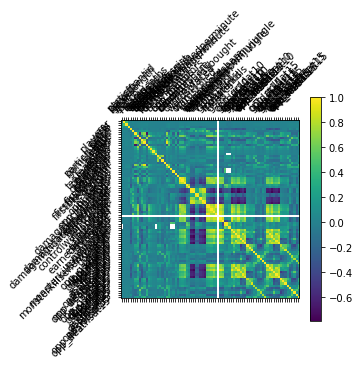

In [39]:
# Correlation matrix
plt.matshow(player_data_copy.corr())
continuous_features = player_data_copy.describe().columns
plt.xticks(range(len(continuous_features)), continuous_features, rotation="45")
plt.yticks(range(len(continuous_features)), continuous_features, rotation="45")
plt.colorbar()
plt.show()


- As you can see plotting directly the correlation cannot solve anything, What we can do is plot the correlation plot without the column names

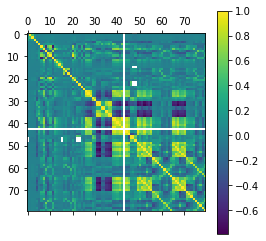

In [40]:
# Correlation matrix
plt.matshow(player_data_copy.corr())
# continuous_features = player_data_copy.describe().columns
# plt.xticks(range(len(continuous_features)), continuous_features, rotation="45")
# plt.yticks(range(len(continuous_features)), continuous_features, rotation="45")
plt.colorbar()
plt.savefig('correlation_heatmap.png')
plt.show()

- From this we can infer that where the value is near 1 that has the most correlation

## Lets first look at each column and different values for each column with a histogram

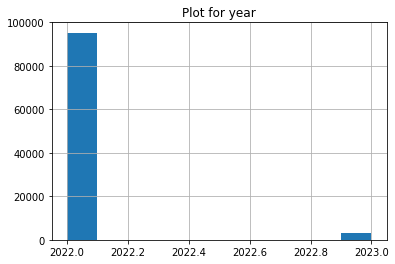

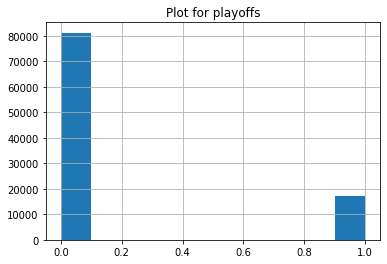

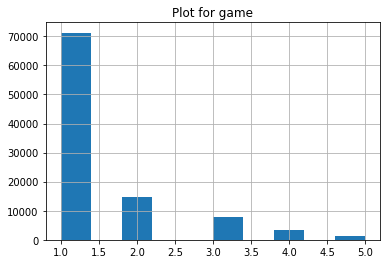

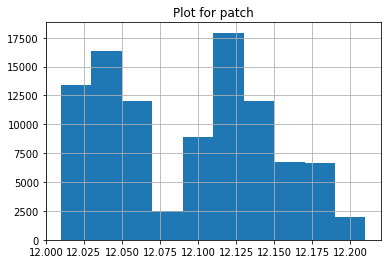

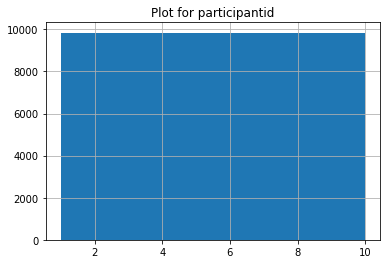

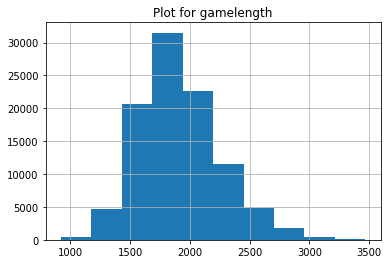

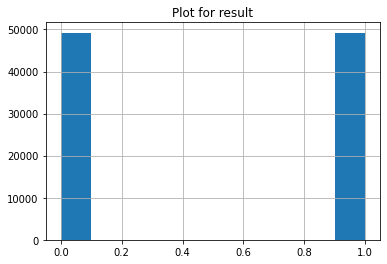

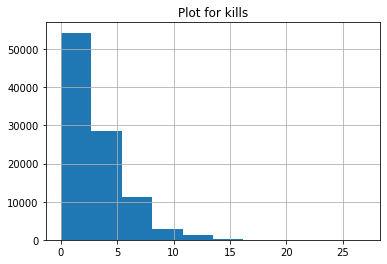

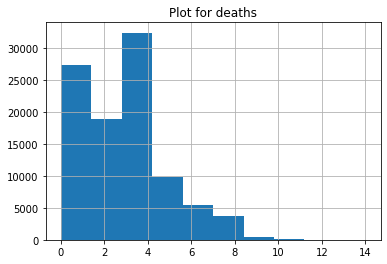

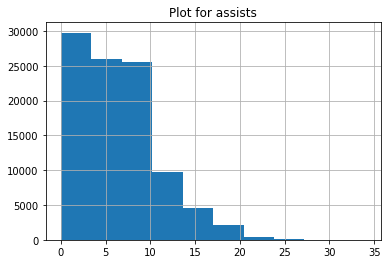

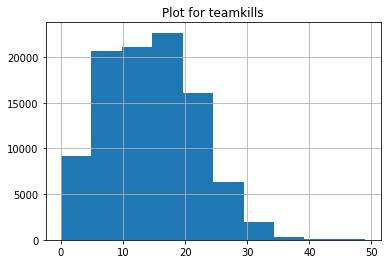

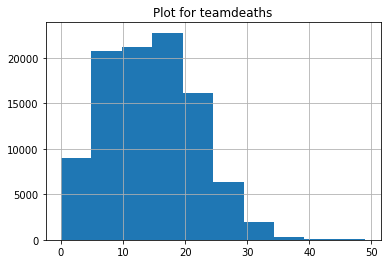

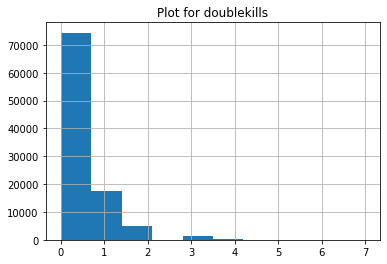

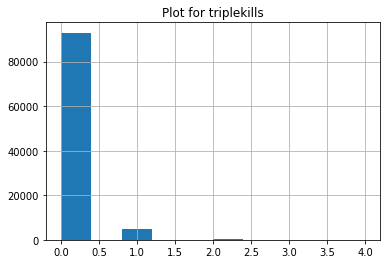

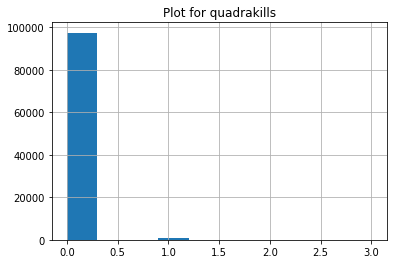

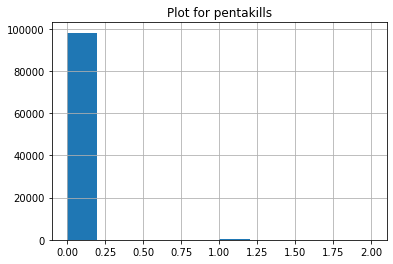

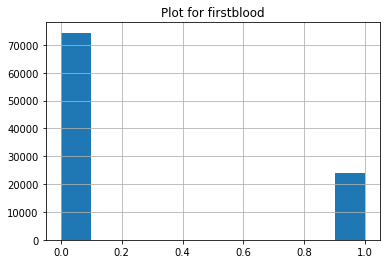

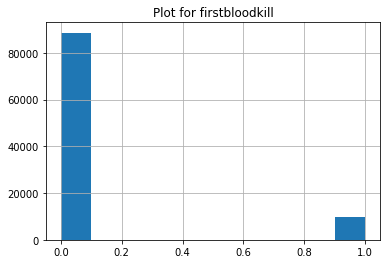

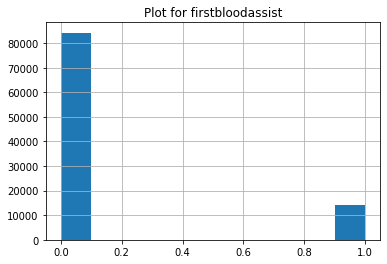

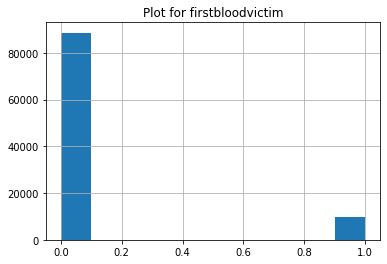

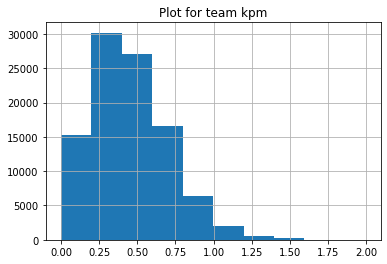

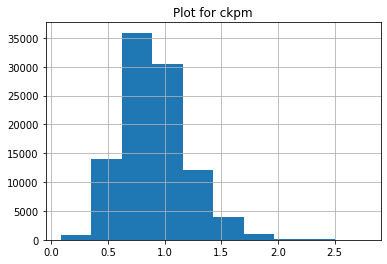

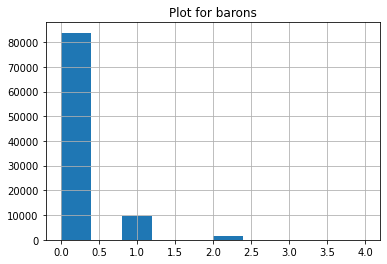

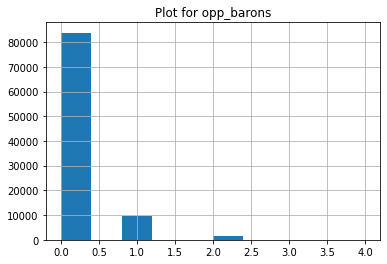

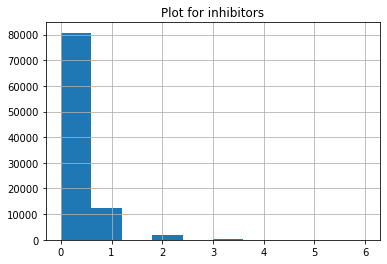

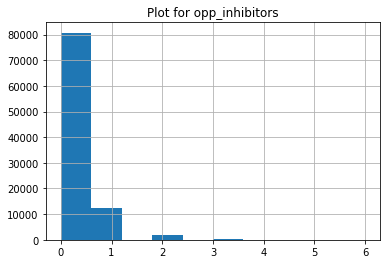

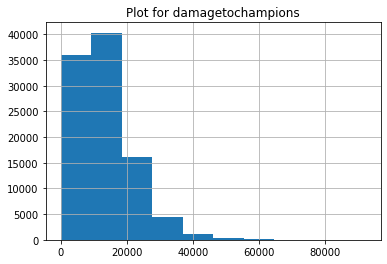

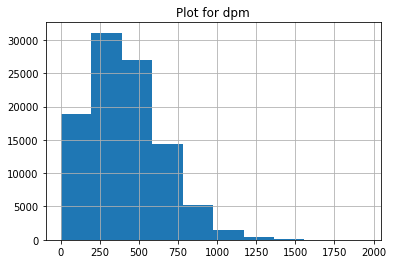

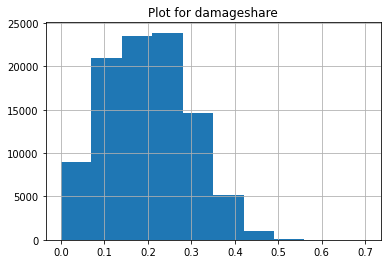

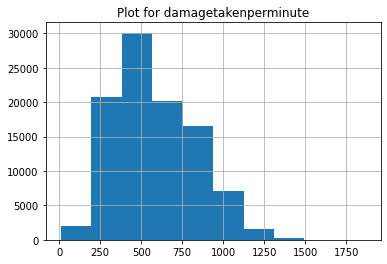

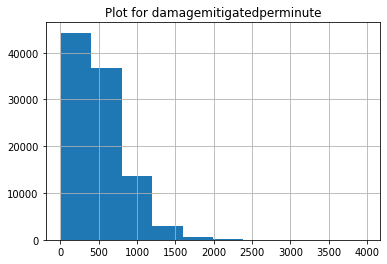

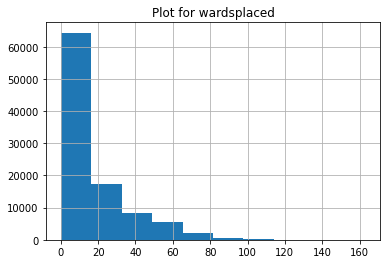

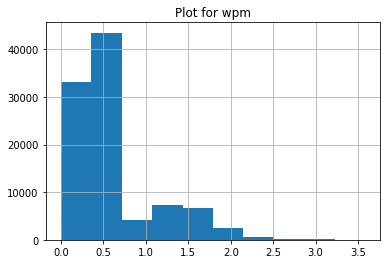

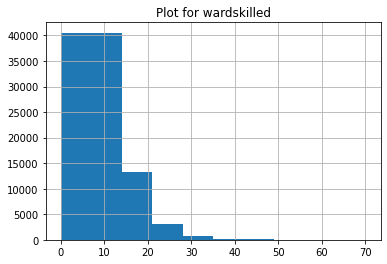

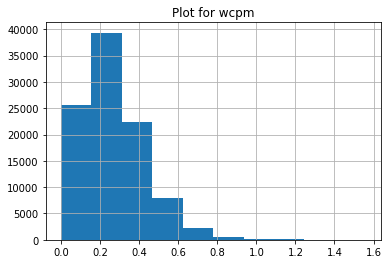

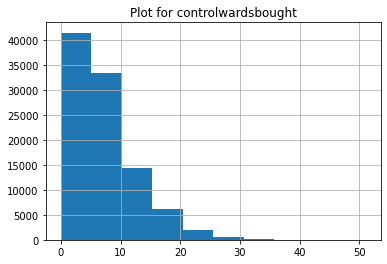

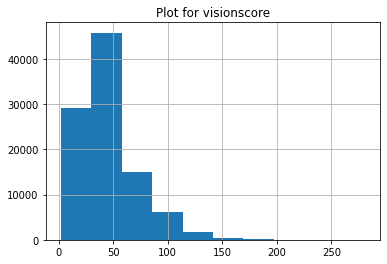

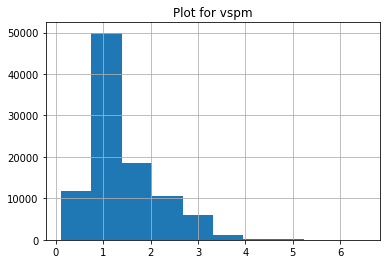

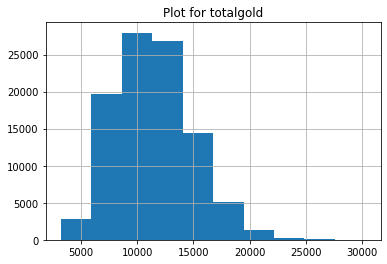

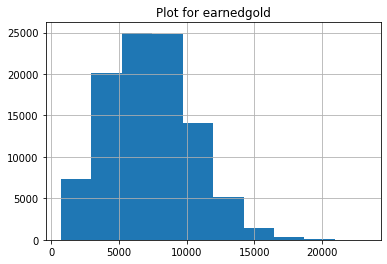

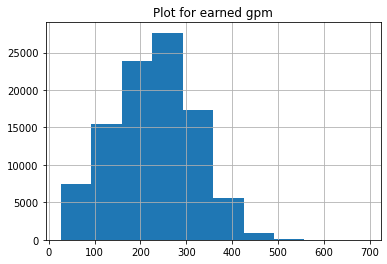

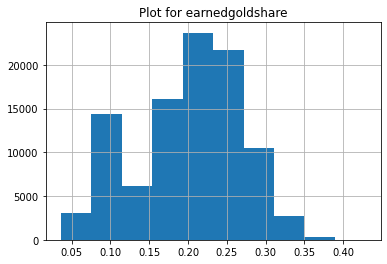

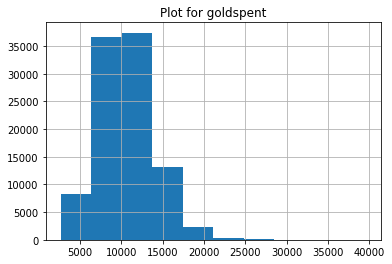

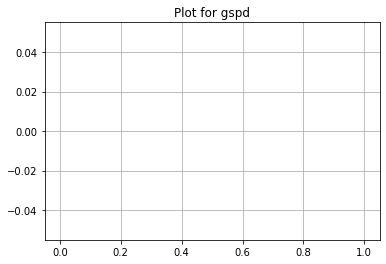

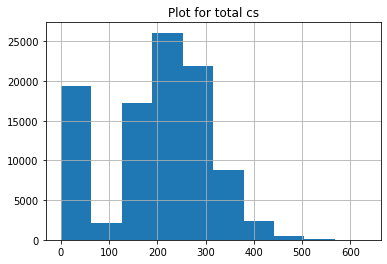

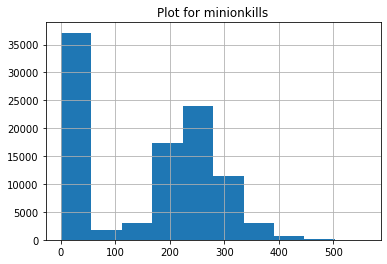

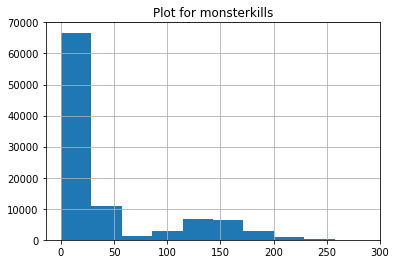

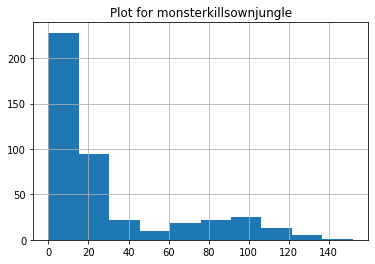

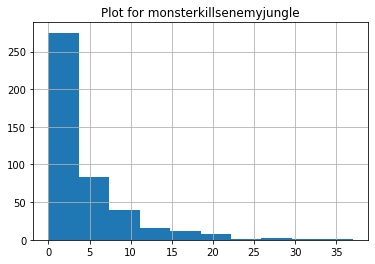

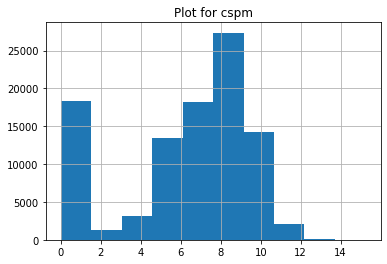

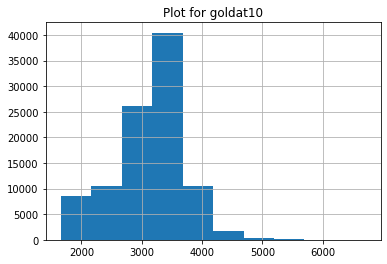

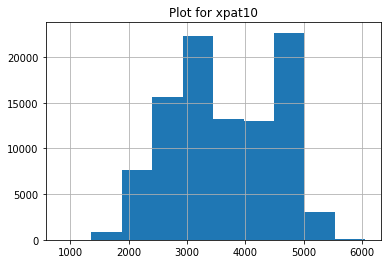

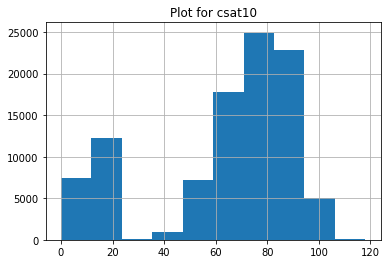

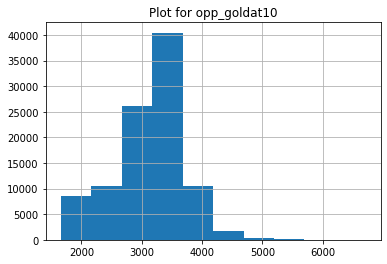

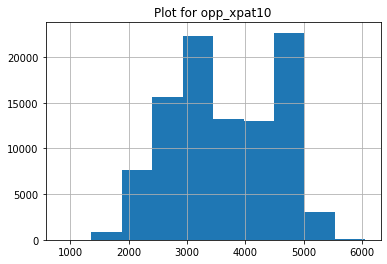

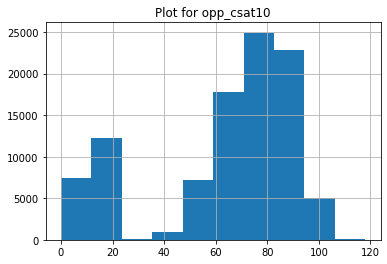

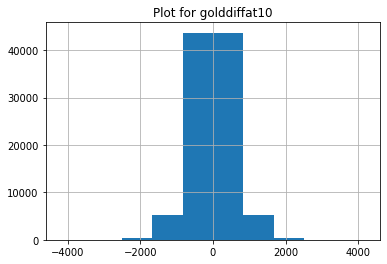

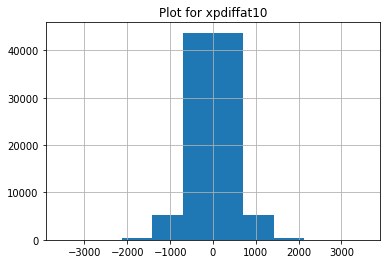

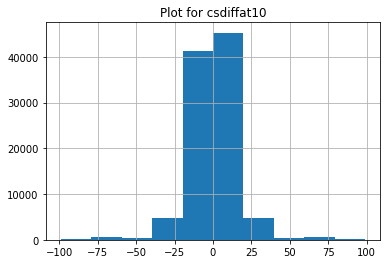

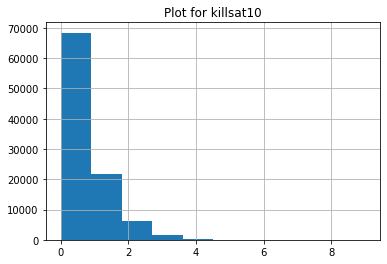

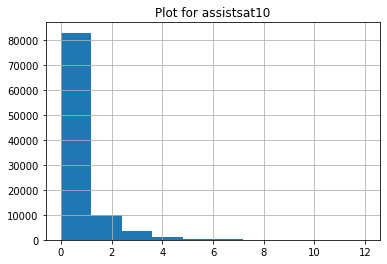

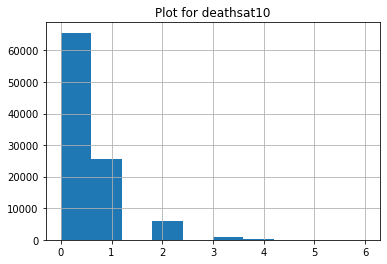

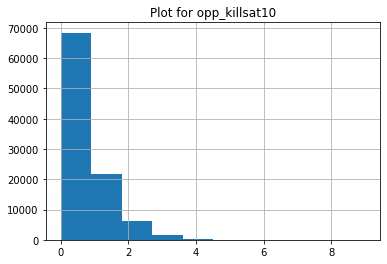

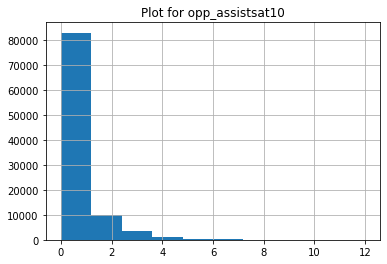

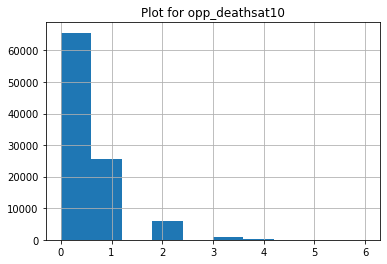

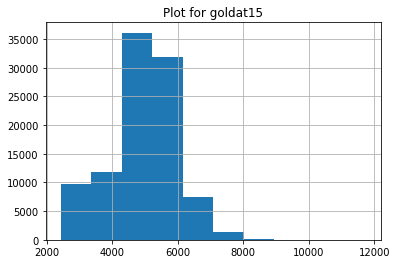

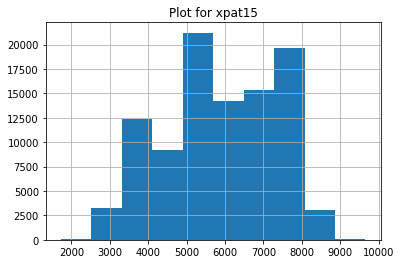

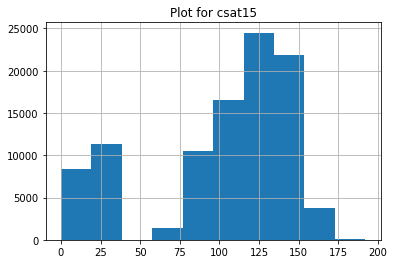

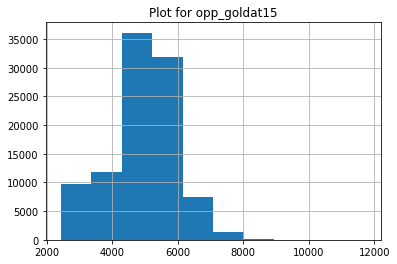

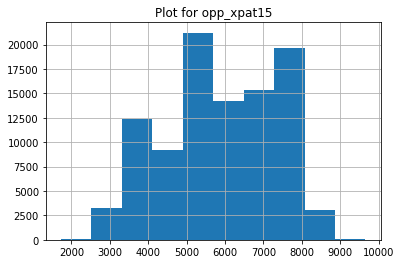

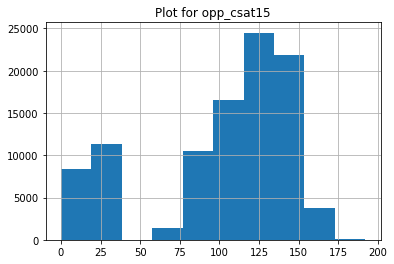

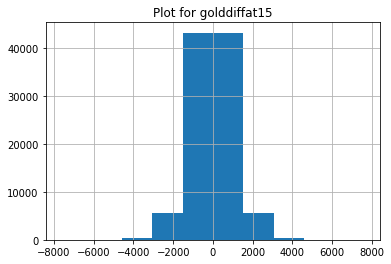

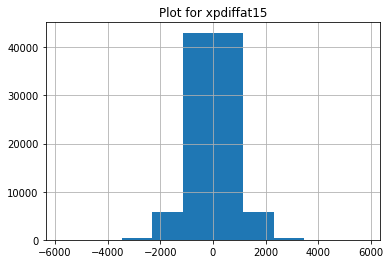

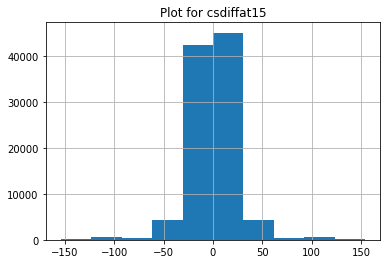

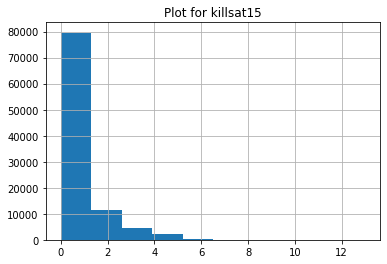

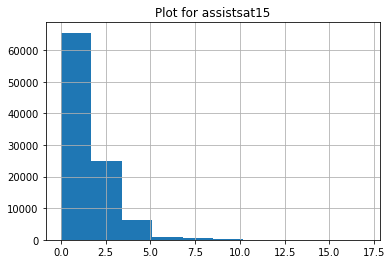

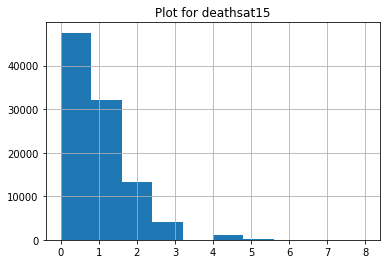

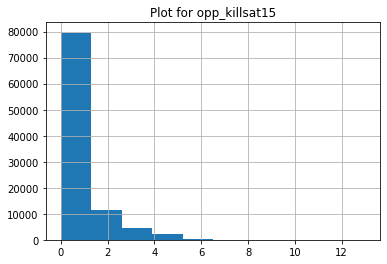

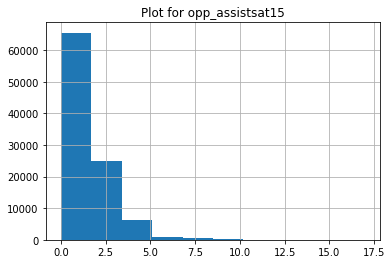

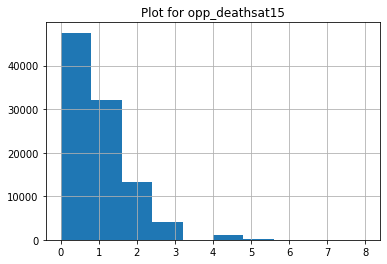

In [41]:
# histogram
for name in player_data_copy.describe().columns:
    player_data_copy[name].hist()
    plt.title(f"Plot for {name}")
    plt.show()

In [42]:
# drop gspd
player_data_copy = player_data_copy.drop(["gspd"], axis=1)

In [43]:
data_len = len(player_data_copy.describe().columns)
print(data_len)

79


### Learn subplots
https://stackoverflow.com/questions/61443444/two-column-subplot-using-matplotlib-and-seaborn

In [44]:
# ncols = 2
# nrows = data_len // ncols

continuous_features = player_data_copy.describe().columns
# fig, ax = plt.subplots(nrows, ncols)
# ax=ax.ravel()
# for idx, a in enumerate(ax):
#     fig.set_figheight(15)
#     fig.set_figwidth(15)
#     a.hist(player_data_copy[continuous_features[idx]])
#     a.set_title(continuous_features[idx])
# plt.tight_layout()


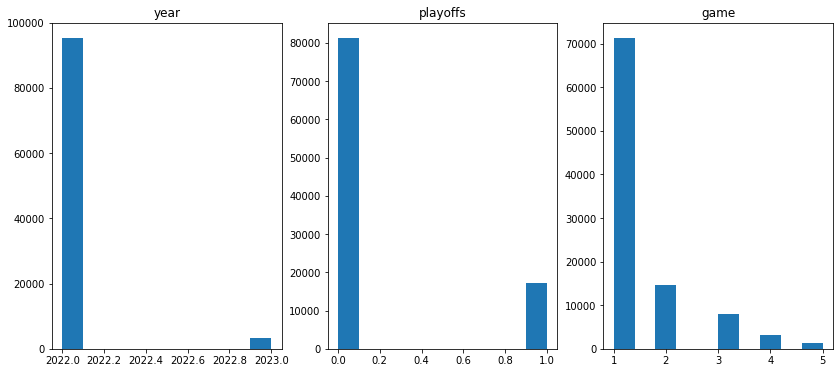

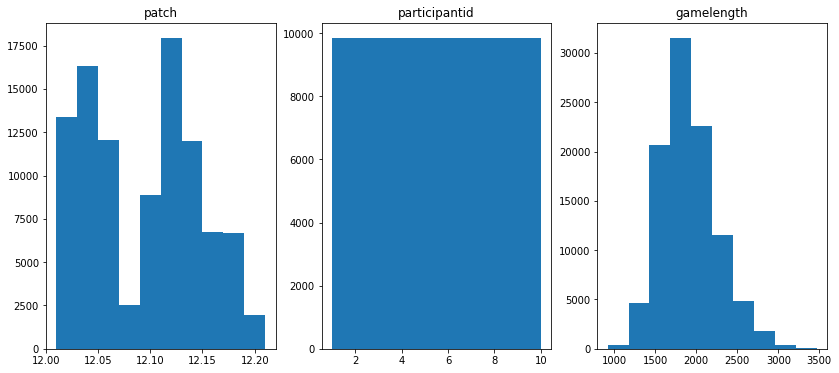

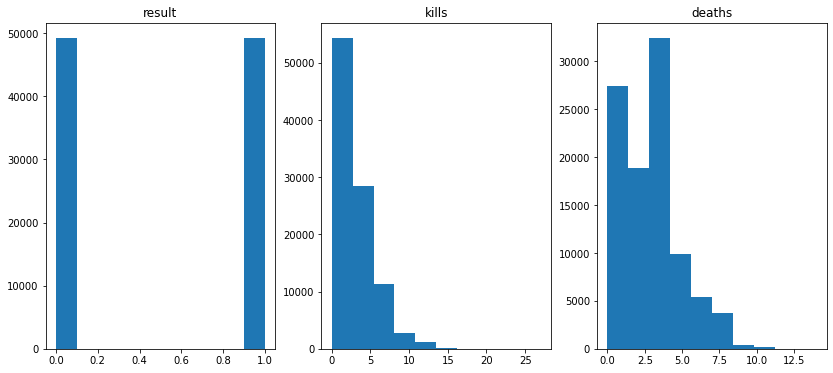

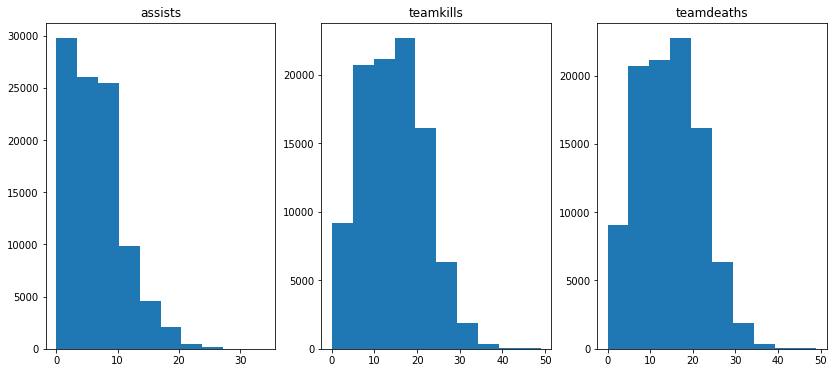

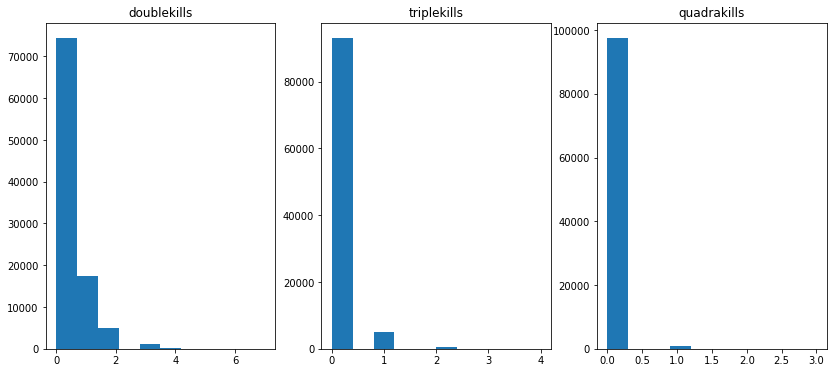

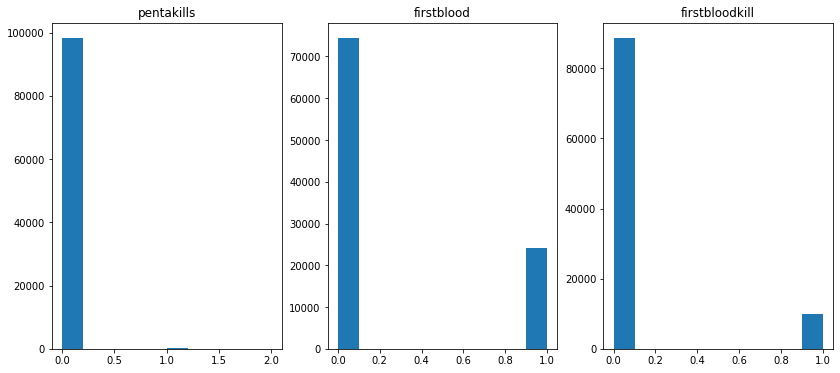

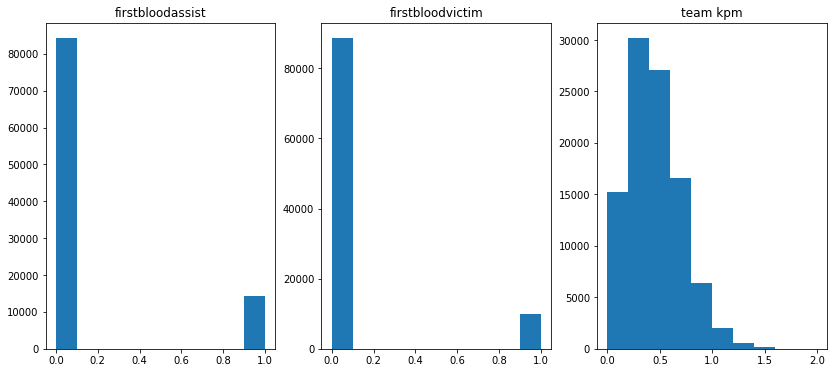

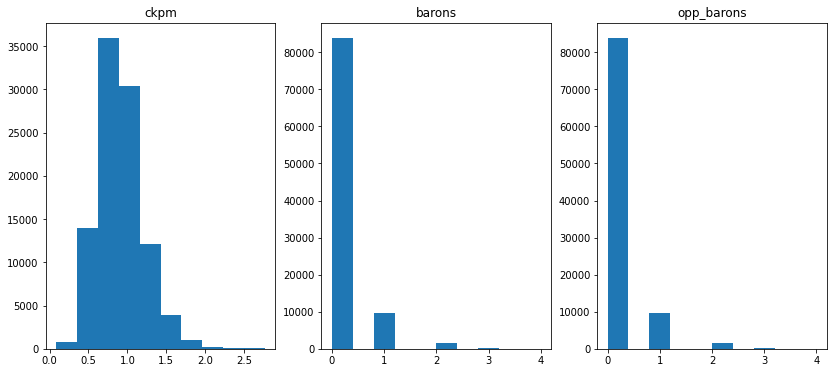

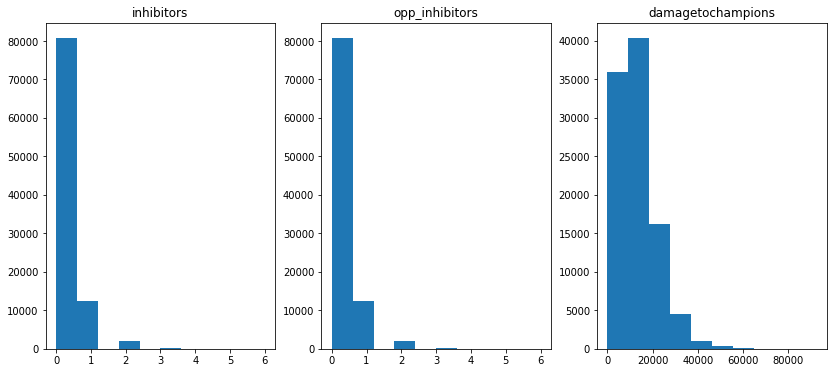

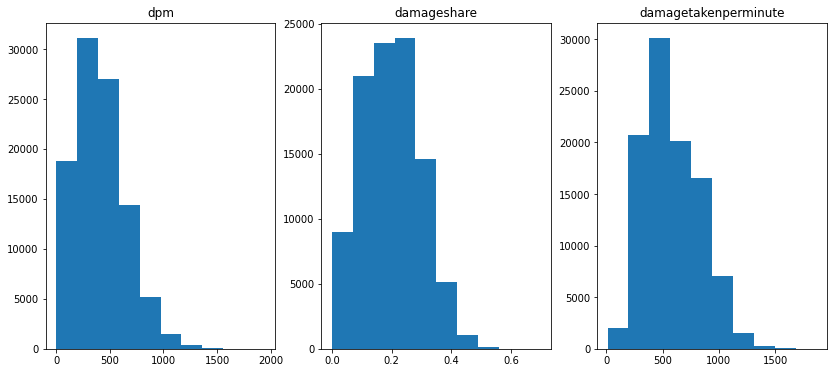

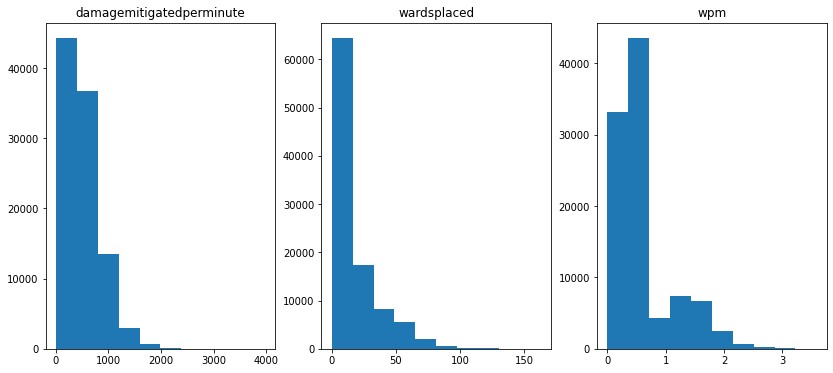

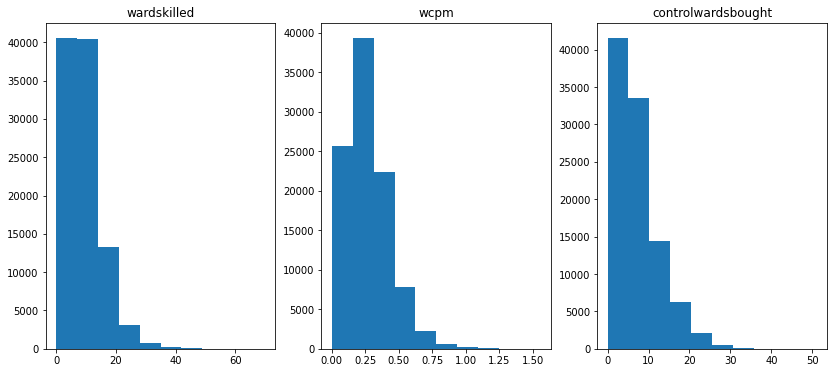

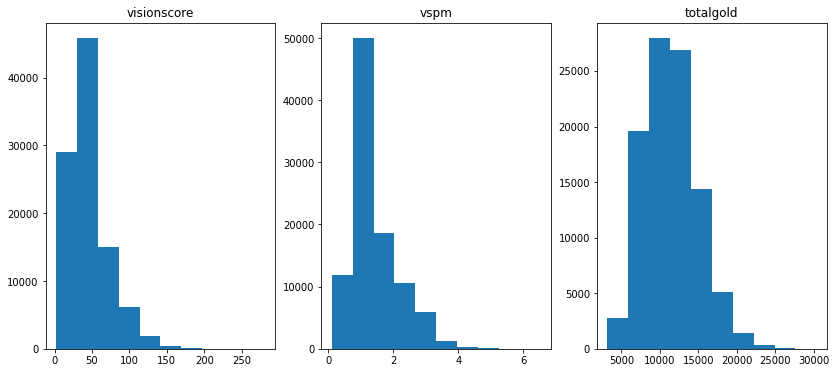

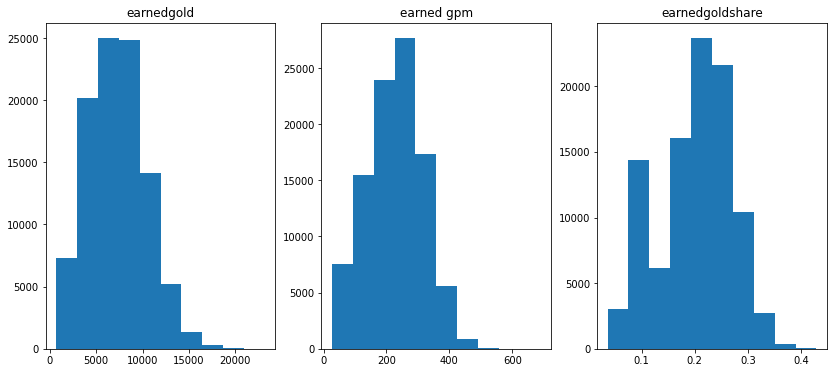

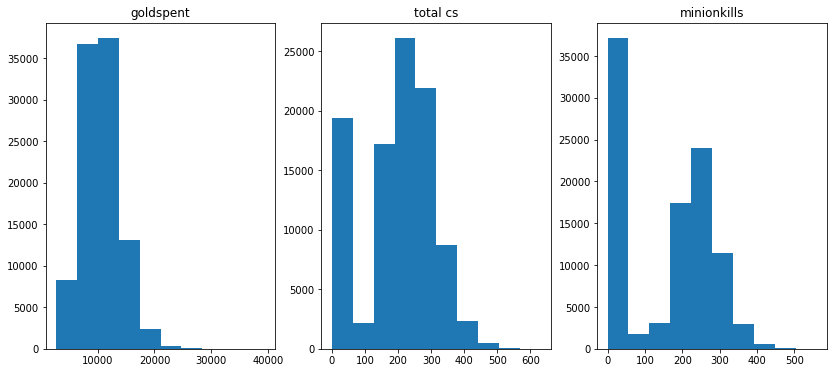

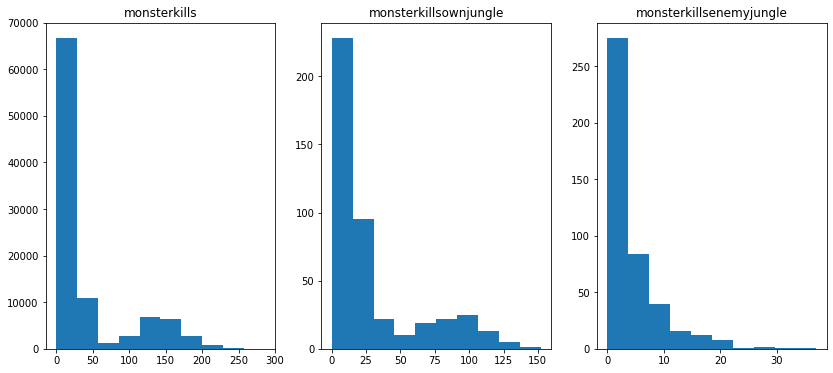

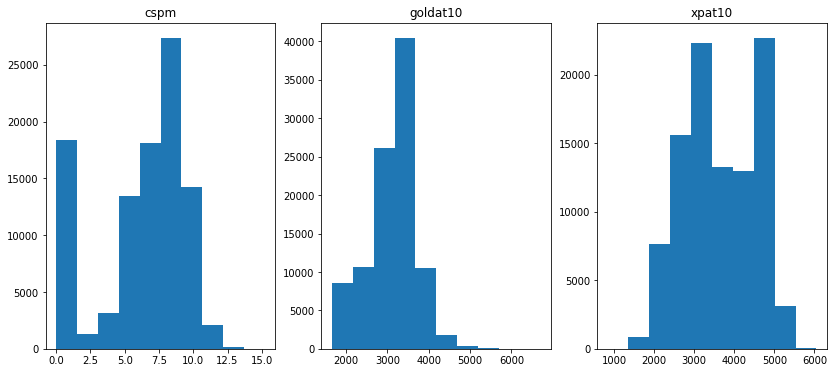

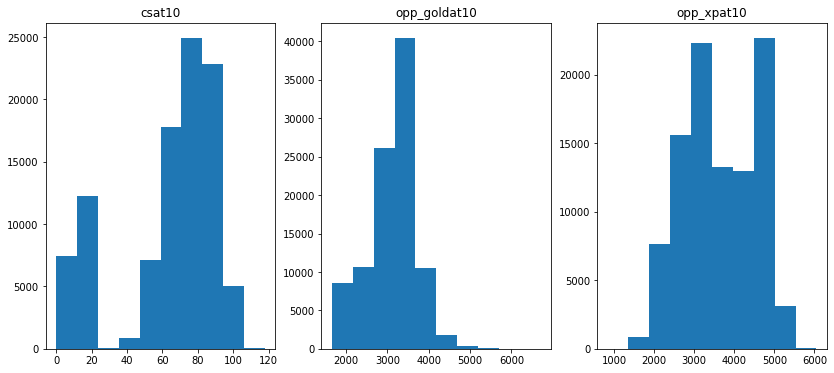

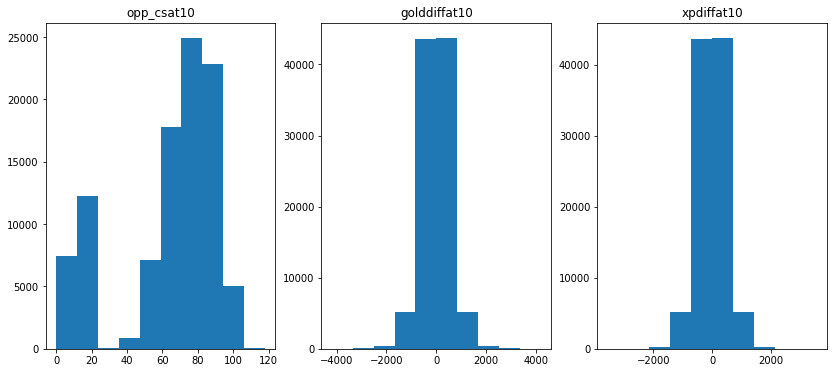

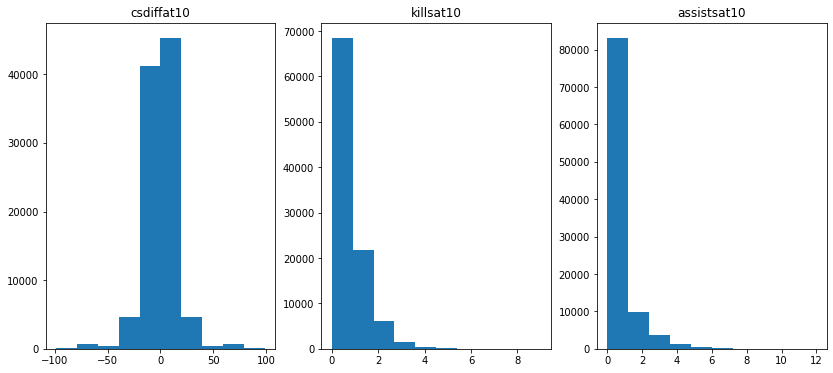

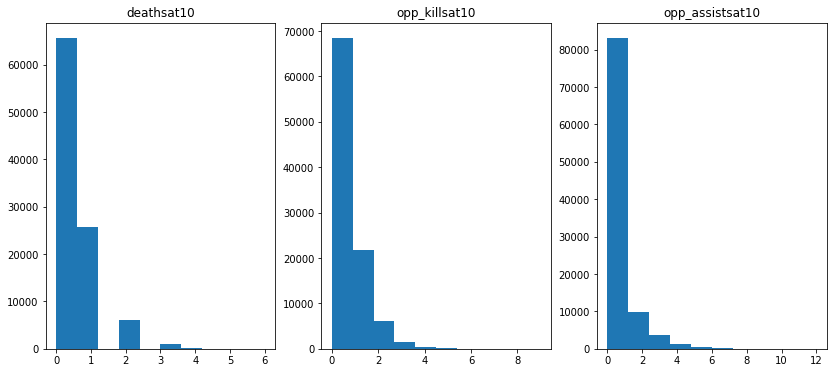

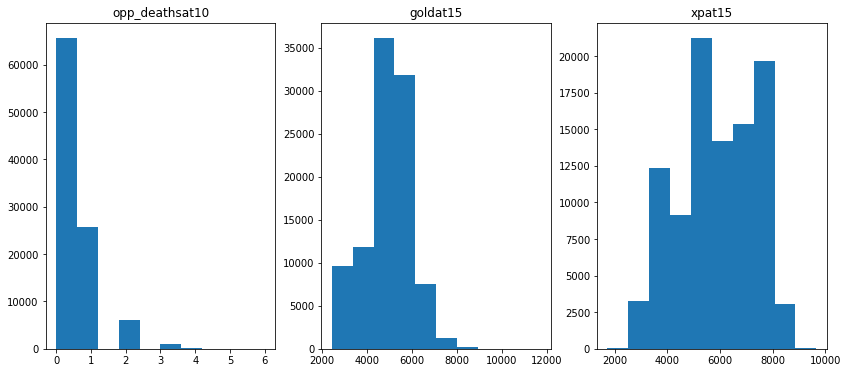

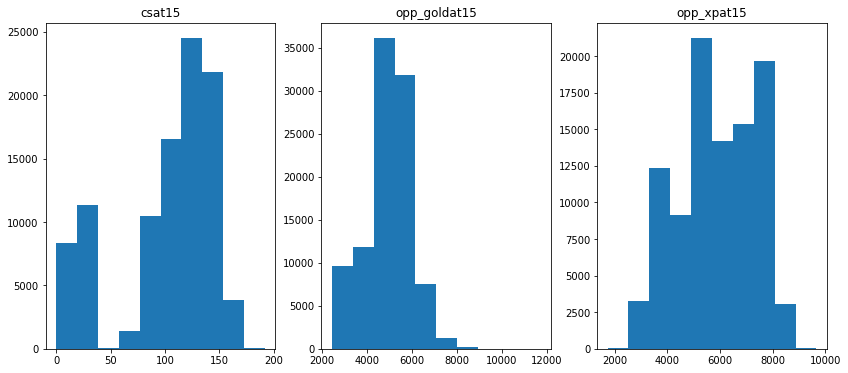

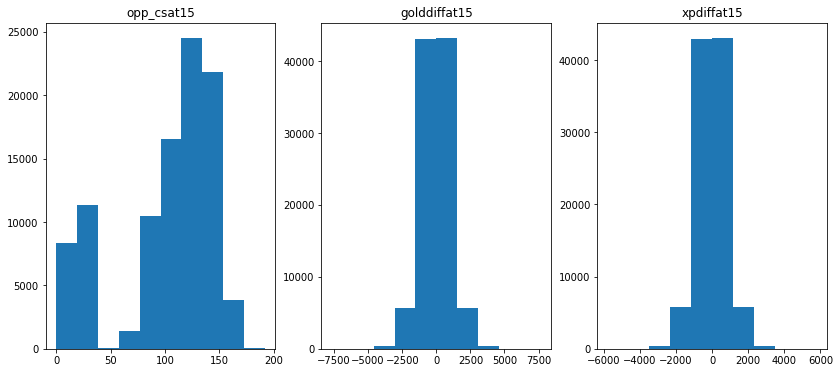

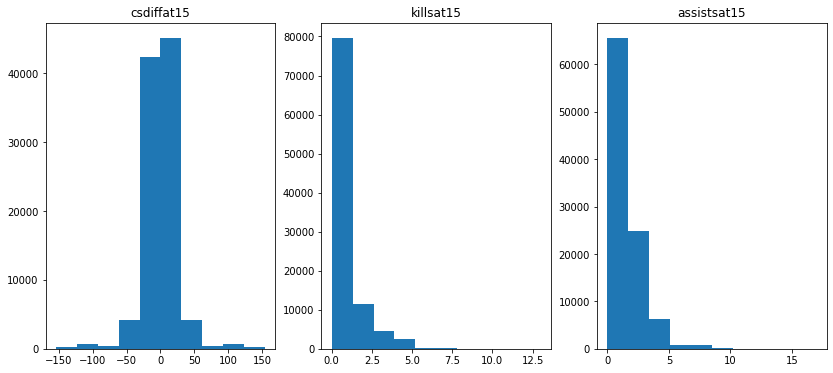

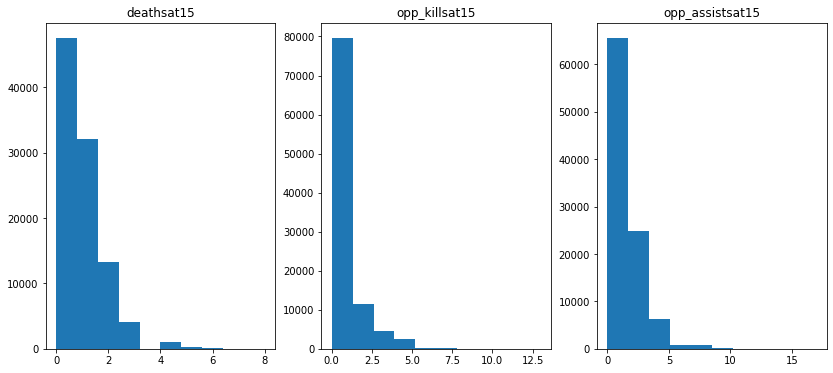

In [45]:

for i in range(0, len(continuous_features)-2, 3):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_figheight(6)
    fig.set_figwidth(14)
    ax1.hist(player_data_copy[continuous_features[i]])
    ax1.set_title(continuous_features[i])

    ax2.hist(player_data_copy[continuous_features[i+1]])
    ax2.set_title(continuous_features[i+1])

    ax3.hist(player_data_copy[continuous_features[i+2]])
    ax3.set_title(continuous_features[i+2])
    # plt.tight_layout()



# Find correlation between match result and all the other features

In [46]:
player_data_copy["result"].corr(player_data_copy["firstblood"])


0.12299344234866488

In [47]:
map_features = {}
for fname in player_data_copy.describe().columns:
    correlation = player_data_copy["result"].corr(player_data_copy[fname])
    map_features[fname] = correlation


In [48]:
from collections import OrderedDict
map_f = OrderedDict(sorted(map_features.items(), key=lambda x:x[1], reverse=True))


In [49]:
corr_df = pd.DataFrame(map_f.items(), columns=["Feature Name", "Correlation"])

In [50]:
corr_df.head(10)

,Feature Name,Correlation
0,result,1.000000
1,teamkills,0.685630
2,team kpm,0.685309
3,assists,0.548257
4,earned gpm,0.382377
5,kills,0.374218
6,inhibitors,0.347580
7,golddiffat15,0.333895
8,earnedgold,0.324121
9,totalgold,0.291943


In [51]:
corr_df.tail()

,Feature Name,Correlation
74,opp_assistsat15,-0.180569
75,opp_barons,-0.231657
76,opp_inhibitors,-0.347414
77,deaths,-0.513170
78,teamdeaths,-0.684245


## Separating the features and label

In [52]:
X = player_data_copy.drop("result", axis=1)
y = player_data_copy["result"]

## Splitting the data into train and test set

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Get the shape of X_train, X_test, y_train
X_train.shape, X_test.shape, y_train.value_counts()

((78736, 94),
 (19684, 94),
 0    39473
 1    39263
 Name: result, dtype: int64)

# Find the Categorical columns

In [55]:
# First get the data type of the columns
X_train.select_dtypes(include=["object"]).columns

Index(['gameid', 'league', 'split', 'side', 'position', 'playername',
       'playerid', 'teamname', 'teamid', 'champion', 'ban1', 'ban2', 'ban3',
       'ban4', 'ban5'],
      dtype='object')

## Analyze the data inside categorical columns
- The main aim is to see the values inside each column
- Figure out if any categorical column is important
- If it is then we need to do one hot encoding

In [56]:
# Split column
X_train.split.value_counts()

Summer     20200
Spring     16733
Split 1     3843
Split 2     2668
Winter      1637
Champ 2      880
Closing      734
Opening      733
Champ 1      655
Pro-Am       571
2022         156
Name: split, dtype: int64

In [57]:
# Side 
X_train.side.value_counts()

Red     39390
Blue    39346
Name: side, dtype: int64

In [58]:
X_train.position.value_counts()

top    15846
mid    15752
sup    15741
jng    15708
bot    15689
Name: position, dtype: int64

In [59]:
X_train.champion.value_counts()

Nautilus        2711
Aphelios        2443
Viego           2391
Jinx            2329
Gnar            1943
                ... 
Aurelion Sol       4
Master Yi          2
Fizz               2
Warwick            1
K'Sante            1
Name: champion, Length: 162, dtype: int64

In [60]:
X_train["ban1"]

67685      Lucian
119877    Taliyah
139314     Maokai
73872       Yuumi
35995     Caitlyn
           ...   
9737        Yuumi
83034        Gwen
117924      Sylas
2208        Akali
23225     Kha'Zix
Name: ban1, Length: 78736, dtype: object

In [61]:
X_train = X_train.reset_index(drop=True)

In [62]:
X_train.head()

,gameid,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,barons,opp_barons,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT03_2714336,MSI,2022,NaN,0,2022-05-21 09:50:19,1,12.08,6,Red,top,Hasmed,oe:player:4d433d67abfab3b3fea642fbcab80e0,Saigon Buffalo,oe:team:8e27b674a472ab529e758f13f0bace0,Kennen,Lucian,Wukong,Zoe,Jayce,Yuumi,1375,0,5,2,6,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2618,1.1345,0.0,0.0,0.0,0.0,9659.0,421.4836,0.283696,508.4073,239.6509,9.0,0.3927,8.0,0.3491,4.0,18.0,0.7855,7072,3991.0,174.1527,0.195724,6485.0,181.0,181.0,0.0,NaN,NaN,7.8982,3290.0,4539.0,84.0,3450.0,4491.0,74.0,-160.0,48.0,10.0,0.0,0.0,1.0,1.0,1.0,0.0,4768.0,6765.0,126.0,5712.0,7224.0,119.0,-944.0,-459.0,7.0,0.0,1.0,3.0,2.0,4.0,1.0
1,ESPORTSTMNT06_2542237,ESLOL,2022,Summer,1,2022-08-07 16:53:39,2,12.13,10,Red,sup,Rychly,oe:player:8a557b75be64213044586f7efc41158,The Agency,oe:team:8c81de10bc9e8ffe93375f78b73aed8,Amumu,Taliyah,Trundle,Gnar,Aphelios,Kalista,2700,2,4,14,24,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5333,0.8000,0.0,0.0,0.0,0.0,4578.0,101.7333,0.045308,516.6667,738.6222,68.0,1.5111,11.0,0.2444,15.0,122.0,2.7111,10597,4813.0,106.9556,0.081424,9675.0,37.0,37.0,0.0,NaN,NaN,0.8222,2060.0,2150.0,13.0,2030.0,2194.0,14.0,30.0,-44.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,2894.0,3101.0,19.0,3173.0,3061.0,18.0,-279.0,40.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,ESPORTSTMNT02_3056927,NLC,2022,Summer,0,2022-10-11 18:14:44,1,12.18,7,Red,jng,Sn1lle,oe:player:947d42fad1e2f3afeb911e5ae3888ce,Nativz,oe:team:a73a242584df96b35d6e606d93608f8,Darius,Maokai,Seraphine,Trundle,Vex,LeBlanc,1626,9,1,6,26,8,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.9594,1.2546,0.0,0.0,0.0,0.0,16449.0,606.9742,0.210093,990.3321,684.2804,3.0,0.1107,5.0,0.1845,3.0,25.0,0.9225,13060,9467.0,349.3358,0.235268,10425.0,179.0,24.0,155.0,NaN,NaN,6.6052,4425.0,4154.0,71.0,3667.0,3718.0,74.0,758.0,436.0,-3.0,3.0,1.0,0.0,1.0,1.0,0.0,6701.0,6078.0,102.0,5796.0,5665.0,99.0,905.0,413.0,3.0,4.0,2.0,1.0,2.0,3.0,2.0
3,ESPORTSTMNT05_2750208,LFL,2022,Summer,0,2022-06-08 16:38:32,1,12.10,1,Blue,top,Ragner,oe:player:c0f78343a2ad4ba1463245d53a3b440,LDLC OL,oe:team:e31c6dcc465e0b94500ef023f42cdc1,Ornn,Yuumi,Gwen,Renata Glasc,Camille,Gnar,1883,0,0,11,13,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4142,0.5736,0.0,0.0,0.0,0.0,15382.0,490.1328,0.215873,581.2639,910.6745,15.0,0.4780,2.0,0.0637,4.0,32.0,1.0196,11916,7799.0,248.5077,0.191593,11050.0,260.0,248.0,12.0,NaN,NaN,8.2847,3748.0,5042.0,96.0,2886.0,4524.0,72.0,862.0,518.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,5742.0,7846.0,153.0,4484.0,7679.0,126.0,1258.0,167.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ESPORTSTMNT01_2745235,LCSA,2022,Spring,0,2022-03-03 21:41:10,2,12.04,8,Red,mid,Soligo,oe:player:d3b78a30a7132a543fe9f14a5a25918,Evil Geniuses Academy,oe:team:7276a3089a0ff2fb055ae059a87bebf,Vex,Caitlyn,Gwen,Hecarim,Nautilus,Thresh,1384,0,4,1,3,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1301,0.6503,0.0,0.0,0.0,1.0,5067.0,219.6676,0.136415,415.7081,204.0173,12.0,0.5202,3.0,0.1301,5.0,19.0,0.8237,6432,3334.0,144.5376,0.172522,6225.0,148.0,146.0,2.0,NaN,NaN,6.4162,3032.0,4517.0,76.0,3615.0,5055.0,91.0,-583.0,-538.0,-15.0,0.0,0.0,1.0,1.0,0.0,0.0,4634.0,6692.

In [63]:
# Removing the categorical columns
cat_columns = ['gameid', 'league', 'split', 
'side', 'position', 'playername','playerid', 'teamname', 
'teamid', 'champion', 'ban1', 'ban2', 'ban3',
'ban4', 'ban5']
X_train = X_train.drop(cat_columns, axis=1)

X_test = X_test.drop(cat_columns, axis=1)

In [64]:
X_train.head()

,year,playoffs,date,game,patch,participantid,gamelength,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,barons,opp_barons,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,2022,0,2022-05-21 09:50:19,1,12.08,6,1375,0,5,2,6,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2618,1.1345,0.0,0.0,0.0,0.0,9659.0,421.4836,0.283696,508.4073,239.6509,9.0,0.3927,8.0,0.3491,4.0,18.0,0.7855,7072,3991.0,174.1527,0.195724,6485.0,181.0,181.0,0.0,NaN,NaN,7.8982,3290.0,4539.0,84.0,3450.0,4491.0,74.0,-160.0,48.0,10.0,0.0,0.0,1.0,1.0,1.0,0.0,4768.0,6765.0,126.0,5712.0,7224.0,119.0,-944.0,-459.0,7.0,0.0,1.0,3.0,2.0,4.0,1.0
1,2022,1,2022-08-07 16:53:39,2,12.13,10,2700,2,4,14,24,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5333,0.8000,0.0,0.0,0.0,0.0,4578.0,101.7333,0.045308,516.6667,738.6222,68.0,1.5111,11.0,0.2444,15.0,122.0,2.7111,10597,4813.0,106.9556,0.081424,9675.0,37.0,37.0,0.0,NaN,NaN,0.8222,2060.0,2150.0,13.0,2030.0,2194.0,14.0,30.0,-44.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,2894.0,3101.0,19.0,3173.0,3061.0,18.0,-279.0,40.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2022,0,2022-10-11 18:14:44,1,12.18,7,1626,9,1,6,26,8,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.9594,1.2546,0.0,0.0,0.0,0.0,16449.0,606.9742,0.210093,990.3321,684.2804,3.0,0.1107,5.0,0.1845,3.0,25.0,0.9225,13060,9467.0,349.3358,0.235268,10425.0,179.0,24.0,155.0,NaN,NaN,6.6052,4425.0,4154.0,71.0,3667.0,3718.0,74.0,758.0,436.0,-3.0,3.0,1.0,0.0,1.0,1.0,0.0,6701.0,6078.0,102.0,5796.0,5665.0,99.0,905.0,413.0,3.0,4.0,2.0,1.0,2.0,3.0,2.0
3,2022,0,2022-06-08 16:38:32,1,12.10,1,1883,0,0,11,13,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4142,0.5736,0.0,0.0,0.0,0.0,15382.0,490.1328,0.215873,581.2639,910.6745,15.0,0.4780,2.0,0.0637,4.0,32.0,1.0196,11916,7799.0,248.5077,0.191593,11050.0,260.0,248.0,12.0,NaN,NaN,8.2847,3748.0,5042.0,96.0,2886.0,4524.0,72.0,862.0,518.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,5742.0,7846.0,153.0,4484.0,7679.0,126.0,1258.0,167.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022,0,2022-03-03 21:41:10,2,12.04,8,1384,0,4,1,3,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1301,0.6503,0.0,0.0,0.0,1.0,5067.0,219.6676,0.136415,415.7081,204.0173,12.0,0.5202,3.0,0.1301,5.0,19.0,0.8237,6432,3334.0,144.5376,0.172522,6225.0,148.0,146.0,2.0,NaN,NaN,6.4162,3032.0,4517.0,76.0,3615.0,5055.0,91.0,-583.0,-538.0,-15.0,0.0,0.0,1.0,1.0,0.0,0.0,4634.0,6692.0,118.0,5745.0,7563.0,139.0,-1111.0,-871.0,-21.0,0.0,1.0,1.0,2.0,0.0,1.0


In [65]:
for c in X_train.columns:
    if "id" in c:
        print(c)

participantid


In [66]:
# Get rid of year and date and participantid
X_train = X_train.drop(["year", "date", "participantid"], axis=1)
X_test = X_test.drop(["year", "date", "participantid"], axis=1)


In [67]:
X_train

,playoffs,game,patch,gamelength,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,barons,opp_barons,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,0,1,12.08,1375,0,5,2,6,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2618,1.1345,0.0,0.0,0.0,0.0,9659.0,421.4836,0.283696,508.4073,239.6509,9.0,0.3927,8.0,0.3491,4.0,18.0,0.7855,7072,3991.0,174.1527,0.195724,6485.0,181.0,181.0,0.0,NaN,NaN,7.8982,3290.0,4539.0,84.0,3450.0,4491.0,74.0,-160.0,48.0,10.0,0.0,0.0,1.0,1.0,1.0,0.0,4768.0,6765.0,126.0,5712.0,7224.0,119.0,-944.0,-459.0,7.0,0.0,1.0,3.0,2.0,4.0,1.0
1,1,2,12.13,2700,2,4,14,24,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5333,0.8000,0.0,0.0,0.0,0.0,4578.0,101.7333,0.045308,516.6667,738.6222,68.0,1.5111,11.0,0.2444,15.0,122.0,2.7111,10597,4813.0,106.9556,0.081424,9675.0,37.0,37.0,0.0,NaN,NaN,0.8222,2060.0,2150.0,13.0,2030.0,2194.0,14.0,30.0,-44.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,2894.0,3101.0,19.0,3173.0,3061.0,18.0,-279.0,40.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,1,12.18,1626,9,1,6,26,8,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.9594,1.2546,0.0,0.0,0.0,0.0,16449.0,606.9742,0.210093,990.3321,684.2804,3.0,0.1107,5.0,0.1845,3.0,25.0,0.9225,13060,9467.0,349.3358,0.235268,10425.0,179.0,24.0,155.0,NaN,NaN,6.6052,4425.0,4154.0,71.0,3667.0,3718.0,74.0,758.0,436.0,-3.0,3.0,1.0,0.0,1.0,1.0,0.0,6701.0,6078.0,102.0,5796.0,5665.0,99.0,905.0,413.0,3.0,4.0,2.0,1.0,2.0,3.0,2.0
3,0,1,12.10,1883,0,0,11,13,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4142,0.5736,0.0,0.0,0.0,0.0,15382.0,490.1328,0.215873,581.2639,910.6745,15.0,0.4780,2.0,0.0637,4.0,32.0,1.0196,11916,7799.0,248.5077,0.191593,11050.0,260.0,248.0,12.0,NaN,NaN,8.2847,3748.0,5042.0,96.0,2886.0,4524.0,72.0,862.0,518.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,5742.0,7846.0,153.0,4484.0,7679.0,126.0,1258.0,167.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2,12.04,1384,0,4,1,3,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1301,0.6503,0.0,0.0,0.0,1.0,5067.0,219.6676,0.136415,415.7081,204.0173,12.0,0.5202,3.0,0.1301,5.0,19.0,0.8237,6432,3334.0,144.5376,0.172522,6225.0,148.0,146.0,2.0,NaN,NaN,6.4162,3032.0,4517.0,76.0,3615.0,5055.0,91.0,-583.0,-538.0,-15.0,0.0,0.0,1.0,1.0,0.0,0.0,4634.0,6692.0,118.0,5745.0,7563.0,139.0,-1111.0,-871.0,-21.0,0.0,1.0,1.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78731,0,2,12.02,2309,0,3,8,13,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3378,0.8315,0.0,0.0,0.0,0.0,14080.0,365.8727,0.208939,863.8285,1187.5790,11.0,0.2858,5.0,0.1299,3.0,29.0,0.7536,13112,8127.0,211.1823,0.198239,12375.0,306.0,302.0,4.0,NaN,NaN,7.9515,3459.0,5059.0,90.0,2838.0,4253.0,62.0,621.0,806.0,28.0,0.0,1.0,0.0,0.0,0.0,1.0,5562.0,8345.0,147.0,4889.0,7192.0,109.0,673.0,1153.0,38.0,0.0,2.0,1.0,1.0,0.0,2.0
78732,0,1,12.11,1811,2,1,5,8,13,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.2650,0.6957,0.0,1.0,0.0,0.0,4172.0,138.2220,0.091185,693.7604,942.2087,10.0,0.3313,11.0,0.3644,11.0,39.0,1.2921,9063,5093.0,168.7355,0.178639,8725.0,155.0,24.0,131.0,NaN,NaN,5.1353,3064.0,3207.0,60.0,2986.0,3181.0,63.0,78.0,26.0,-3.0,0.0,1.0,0.0,0.0,0.0,1.0,4588.0,5527.0,95.0,5342.0,5775.0,108.0,-754.0,-248.0,-13.0,0.0,3.0,0.0,

## Feature scaling on the remaining data

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_transform = sc.transform(X_train)
X_test_transform = sc.transform(X_test)

In [69]:
from xgboost import XGBClassifier

# Create a model
model_1 = XGBClassifier()

# Fit the model
model_1.fit(X_train_transform, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [70]:
from sklearn.metrics import accuracy_score, f1_score
y_train_preds = model_1.predict(X_train_transform)

In [71]:
accuracy_score(y_train, y_train_preds), f1_score(y_train, y_train_preds)

(0.9974852672221093, 0.9974791199837034)

In [72]:
# Selected features
model_1.feature_importances_

array([0.00444117, 0.0040683 , 0.00495114, 0.0083465 , 0.00295355,
       0.00352867, 0.00548888, 0.20687176, 0.23982704, 0.00258181,
       0.00176872, 0.00127213, 0.        , 0.00190612, 0.0011525 ,
       0.00247426, 0.00322334, 0.19003323, 0.00795207, 0.01277777,
       0.01255329, 0.02910209, 0.02578717, 0.00289686, 0.00329486,
       0.00480752, 0.00295688, 0.00277067, 0.00252161, 0.00311526,
       0.00325641, 0.00268073, 0.00230468, 0.00278389, 0.00253873,
       0.00861862, 0.00853629, 0.01168525, 0.01095974, 0.0079827 ,
       0.00259742, 0.00250864, 0.0029822 , 0.        , 0.        ,
       0.00351634, 0.00264542, 0.00296464, 0.00280108, 0.00270275,
       0.00255458, 0.00249609, 0.00247768, 0.00249006, 0.0023097 ,
       0.00541895, 0.00403944, 0.00537969, 0.0022722 , 0.00377115,
       0.00178446, 0.00324948, 0.00330264, 0.00369199, 0.00329748,
       0.00273776, 0.00284281, 0.00285509, 0.00304681, 0.00351564,
       0.01478596, 0.01132553, 0.00489183, 0.00658339, 0.00956

In [73]:
# Predict 
y_preds = model_1.predict(X_test_transform)

In [74]:
# Evaluate using the accuracy score 
accuracy_score(y_test, y_preds), f1_score(y_test, y_preds)

(0.977494411704938, 0.9777084486489206)

In [75]:
# from xgboost import plot_importance
# plot_importance(model)
# plt.show()

In [76]:
# Get feature names
for col, score in zip(X_train.columns, model_1.feature_importances_):
    print(col, score)

playoffs 0.004441174
game 0.0040683015
patch 0.004951136
gamelength 0.008346499
kills 0.002953546
deaths 0.0035286725
assists 0.005488877
teamkills 0.20687176
teamdeaths 0.23982704
doublekills 0.00258181
triplekills 0.0017687177
quadrakills 0.0012721313
pentakills 0.0
firstblood 0.0019061221
firstbloodkill 0.0011525042
firstbloodassist 0.0024742568
firstbloodvictim 0.0032233405
team kpm 0.19003323
ckpm 0.007952072
barons 0.012777768
opp_barons 0.012553287
inhibitors 0.029102089
opp_inhibitors 0.025787165
damagetochampions 0.002896859
dpm 0.0032948554
damageshare 0.004807519
damagetakenperminute 0.00295688
damagemitigatedperminute 0.0027706712
wardsplaced 0.0025216057
wpm 0.003115264
wardskilled 0.0032564087
wcpm 0.0026807324
controlwardsbought 0.002304681
visionscore 0.0027838948
vspm 0.00253873
totalgold 0.008618619
earnedgold 0.008536286
earned gpm 0.011685246
earnedgoldshare 0.010959738
goldspent 0.007982705
total cs 0.0025974242
minionkills 0.0025086368
monsterkills 0.0029821973
mo

> From model.feature_importances_ we can find the worst features and remove them so that we can remove it from the data and again train the model without these features
- Or we can get the top 40 features from the data

In [77]:
sorted_scores = np.sort(model_1.feature_importances_)[::-1]

In [78]:
sorted_scores

array([0.23982704, 0.20687176, 0.19003323, 0.02910209, 0.02578717,
       0.01478596, 0.01277777, 0.01255329, 0.01168525, 0.01132553,
       0.01095974, 0.00982508, 0.00956371, 0.00861862, 0.00853629,
       0.0083465 , 0.0079827 , 0.00795207, 0.00658339, 0.00548888,
       0.00541895, 0.00537969, 0.00495114, 0.00489183, 0.00480752,
       0.00444117, 0.0040683 , 0.00403944, 0.00377115, 0.00369199,
       0.00352867, 0.00351634, 0.00351564, 0.00330264, 0.00329748,
       0.00329486, 0.00325641, 0.00324948, 0.00322334, 0.00311526,
       0.00304681, 0.0029822 , 0.00296464, 0.00295688, 0.00295355,
       0.00289686, 0.00285509, 0.00284281, 0.00280108, 0.00278389,
       0.00277067, 0.00273776, 0.00270275, 0.00268073, 0.00264542,
       0.00259742, 0.00258181, 0.00255458, 0.00253873, 0.00252161,
       0.00250864, 0.00249609, 0.00249006, 0.00247768, 0.00247426,
       0.0023097 , 0.00230468, 0.0022722 , 0.00190612, 0.00178446,
       0.00176872, 0.00127213, 0.0011525 , 0.        , 0.     

In [79]:
indices = []
for s in sorted_scores:
    idx = np.where(model_1.feature_importances_ == s)
    indices.append(idx[0][0])
print(indices[:40])


[8, 7, 17, 21, 22, 70, 19, 20, 37, 71, 38, 75, 74, 35, 36, 3, 39, 18, 73, 6, 55, 57, 2, 72, 25, 0, 1, 56, 59, 63, 5, 45, 69, 62, 64, 24, 30, 61, 16, 29]


## Get top 40 features

In [80]:
top_40_features = []
for idx in indices[:40]:
    top_40_features.append(X_train.columns[idx])

In [81]:
print(top_40_features)

['teamdeaths', 'teamkills', 'team kpm', 'inhibitors', 'opp_inhibitors', 'killsat15', 'barons', 'opp_barons', 'earned gpm', 'assistsat15', 'earnedgoldshare', 'opp_deathsat15', 'opp_assistsat15', 'totalgold', 'earnedgold', 'gamelength', 'goldspent', 'ckpm', 'opp_killsat15', 'assists', 'killsat10', 'deathsat10', 'patch', 'deathsat15', 'damageshare', 'playoffs', 'game', 'assistsat10', 'opp_assistsat10', 'csat15', 'deaths', 'cspm', 'csdiffat15', 'xpat15', 'opp_goldat15', 'dpm', 'wardskilled', 'goldat15', 'firstbloodvictim', 'wpm']


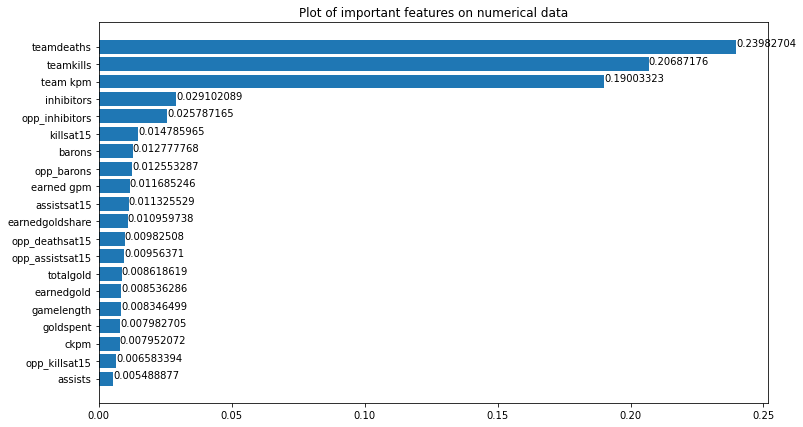

In [82]:
plt.figure(figsize=(12, 7))
plt.barh(top_40_features[:20][::-1], sorted_scores[:20][::-1]);
for i, value in enumerate(sorted_scores[:20][::-1]):
    plt.text(value, i, str(value))
plt.title("Plot of important features on numerical data")
plt.savefig("Experiment 1 Plot.png")
plt.show()


## Experiment model with some categorical variables

In [83]:
# Split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# Removing the categorical columns
cat_columns = ['gameid', 'league', 'split', 
'side', 'position', 'playername','playerid', 'teamname', 
'teamid', 'champion', 'ban1', 'ban2', 'ban3',
'ban4', 'ban5']

remove_columns = [
    "gameid", "playername", "playerid", 
    "teamname", "teamid", "ban1", "ban2", 
    "ban3", "ban4", "ban5", "year", "date", "participantid"
]

remaining_columns = ["split", "side", "position", "champion"]

X_train = X_train.drop(remove_columns, axis=1)

X_test = X_test.drop(remove_columns, axis=1)

In [85]:
print("Split Values: ")
print(X_train.split.value_counts())

print("==============")
print("Side Values: ")
print(X_train.side.value_counts())

print("==============")
print("position values")
print(X_train.position.value_counts())

print("===============")
print("champion values")
print(X_train.champion.value_counts())

Split Values: 
Summer     20200
Spring     16733
Split 1     3843
Split 2     2668
Winter      1637
Champ 2      880
Closing      734
Opening      733
Champ 1      655
Pro-Am       571
2022         156
Name: split, dtype: int64
Side Values: 
Red     39390
Blue    39346
Name: side, dtype: int64
position values
top    15846
mid    15752
sup    15741
jng    15708
bot    15689
Name: position, dtype: int64
champion values
Nautilus        2711
Aphelios        2443
Viego           2391
Jinx            2329
Gnar            1943
                ... 
Aurelion Sol       4
Master Yi          2
Fizz               2
Warwick            1
K'Sante            1
Name: champion, Length: 162, dtype: int64


- All are manageable but if we apply one hot encoding to **`champion`** category then it will convert into 160 additional columns and the dataset will be complex

In [86]:
print(X_train.champion.value_counts()[:30])

Nautilus        2711
Aphelios        2443
Viego           2391
Jinx            2329
Gnar            1943
Ahri            1827
Lee Sin         1689
Gwen            1688
Wukong          1671
Leona           1617
Xin Zhao        1609
Zeri            1512
Viktor          1438
Ornn            1377
Rakan           1282
Sylas           1252
Azir            1249
Renata Glasc    1177
Trundle         1168
Ezreal          1161
Graves          1129
Volibear        1077
Tahm Kench      1076
Sejuani         1026
Karma           1007
Akali            995
Camille          983
Lulu             954
Gangplank        942
Corki            927
Name: champion, dtype: int64


In [87]:
print(X_train.champion.value_counts()[30:50])

Ryze         910
Jarvan IV    883
Renekton     876
Aatrox       866
Hecarim      833
Thresh       830
Lucian       816
LeBlanc      800
Jhin         800
Yuumi        788
Gragas       786
Braum        765
Xayah        761
Taliyah      753
Poppy        732
Sivir        723
Kai'Sa       721
Kalista      714
Nami         690
Jayce        687
Name: champion, dtype: int64


> The first thing will be to decide the **`threshold`** based on the number of groups we want

- Let's try to divide it into 10 categories

In [88]:
X_train.champion.value_counts()[:10]

Nautilus    2711
Aphelios    2443
Viego       2391
Jinx        2329
Gnar        1943
Ahri        1827
Lee Sin     1689
Gwen        1688
Wukong      1671
Leona       1617
Name: champion, dtype: int64

In [89]:
X_test.champion.value_counts()[:10]

Nautilus    667
Aphelios    637
Jinx        595
Viego       578
Gnar        467
Ahri        451
Lee Sin     446
Wukong      443
Leona       437
Xin Zhao    432
Name: champion, dtype: int64

In [90]:
replace_map = {}
count = 0
for k, v in X_train.champion.value_counts().items():
    if count < 10:
        replace_map[k] = k
    else:
        replace_map[k] = "Other"
    count += 1
replace_map


{'Nautilus': 'Nautilus',
 'Aphelios': 'Aphelios',
 'Viego': 'Viego',
 'Jinx': 'Jinx',
 'Gnar': 'Gnar',
 'Ahri': 'Ahri',
 'Lee Sin': 'Lee Sin',
 'Gwen': 'Gwen',
 'Wukong': 'Wukong',
 'Leona': 'Leona',
 'Xin Zhao': 'Other',
 'Zeri': 'Other',
 'Viktor': 'Other',
 'Ornn': 'Other',
 'Rakan': 'Other',
 'Sylas': 'Other',
 'Azir': 'Other',
 'Renata Glasc': 'Other',
 'Trundle': 'Other',
 'Ezreal': 'Other',
 'Graves': 'Other',
 'Volibear': 'Other',
 'Tahm Kench': 'Other',
 'Sejuani': 'Other',
 'Karma': 'Other',
 'Akali': 'Other',
 'Camille': 'Other',
 'Lulu': 'Other',
 'Gangplank': 'Other',
 'Corki': 'Other',
 'Ryze': 'Other',
 'Jarvan IV': 'Other',
 'Renekton': 'Other',
 'Aatrox': 'Other',
 'Hecarim': 'Other',
 'Thresh': 'Other',
 'Lucian': 'Other',
 'LeBlanc': 'Other',
 'Jhin': 'Other',
 'Yuumi': 'Other',
 'Gragas': 'Other',
 'Braum': 'Other',
 'Xayah': 'Other',
 'Taliyah': 'Other',
 'Poppy': 'Other',
 'Sivir': 'Other',
 "Kai'Sa": 'Other',
 'Kalista': 'Other',
 'Nami': 'Other',
 'Jayce': 'Othe

In [91]:
X_train.champion.replace(replace_map)

67685     Other
119877    Other
139314    Other
73872     Other
35995     Other
          ...  
9737      Other
83034     Other
117924    Other
2208       Gwen
23225     Other
Name: champion, Length: 78736, dtype: object

- According to the above cell, to make 10 groups we can set the `threshold` to be 1600

Dividing the columns based on value counts 
https://stackoverflow.com/questions/44527731/one-hot-encoding-for-frequent-values-only

In [92]:
# threshold = 1600
# threshold_test = 400
# champion_counts = X_train.champion.value_counts()
# champion_counts_test = X_test.champion.value_counts()

# below_threshold = champion_counts[champion_counts <= threshold].index
# below_threshold_test = champion_counts_test[champion_counts_test <= threshold_test].index

X_train["champion"] = X_train.champion.replace(replace_map)
X_test["champion"] = X_test.champion.replace(replace_map)



In [93]:
X_train.champion.value_counts()

Other       58427
Nautilus     2711
Aphelios     2443
Viego        2391
Jinx         2329
Gnar         1943
Ahri         1827
Lee Sin      1689
Gwen         1688
Wukong       1671
Leona        1617
Name: champion, dtype: int64

In [94]:
X_test.champion.value_counts()

Other       14570
Nautilus      667
Aphelios      637
Jinx          595
Viego         578
Gnar          467
Ahri          451
Lee Sin       446
Wukong        443
Leona         437
Gwen          393
Name: champion, dtype: int64

## Feature scaling 
- Categorical columns: Apply one hot encoding
- Numerical columns: Apply standard scaler

In [95]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

numerical_columns = X_train.describe().columns
categorical_columns = ["split", "side", "position", "champion"]

# Making a column transformer
ct_1 = make_column_transformer(
    (StandardScaler(), numerical_columns),
    (OneHotEncoder(), categorical_columns)
)

# Fitting on the training data
ct_1.fit(X_train)

# Transforming the data into scaled data
X_train_transformed = ct_1.transform(X_train)
X_test_transformed = ct_1.transform(X_test)

In [96]:
scaled_columns = []
for ct_col in ct_1.get_feature_names_out():
    scaled_columns.append(ct_col.split("__")[1])

In [97]:
model_2 = XGBClassifier(random_state=42)

# training the model
model_2.fit(X_train_transformed, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [98]:
y_train_preds_2 = model_2.predict(X_train_transformed)
accuracy_score(y_train, y_train_preds_2), f1_score(y_train, y_train_preds_2)

(0.9975868725868726, 0.997581281666115)

In [99]:
y_preds_2 = model_2.predict(X_test_transformed)
accuracy_score(y_test, y_preds_2), f1_score(y_test, y_preds_2)

(0.9789676894940053, 0.9791729550256565)

In [100]:
def plot_40_features(model, scaled_columns, fig_name="Player Features"):
    sorted_scores = np.sort(model.feature_importances_)[::-1]
    indices = []
    for s in sorted_scores:
        idx = np.where(model.feature_importances_ == s)
        indices.append(idx[0][0])
    
    top_40_features = []
    for idx in indices[:40]:
        top_40_features.append(scaled_columns[idx])

    plt.figure(figsize=(12, 7))
    plt.title(f'Plot of {fig_name}')
    plt.barh(top_40_features[:20][::-1], sorted_scores[:20][::-1]);
    for i, value in enumerate(sorted_scores[:20][::-1]):
        plt.text(value, i, str(value))
    
    plt.savefig(f'{fig_name}.png')
    plt.show()
    
    return indices, sorted_scores, top_40_features


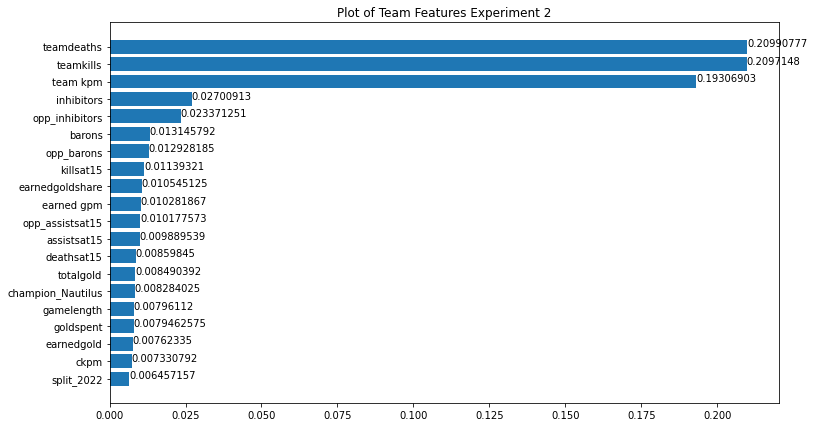

In [101]:
indices, s, top_40 = plot_40_features(model_2, scaled_columns, fig_name="Team Features Experiment 2")

In [102]:
for col in match_data.columns:
    if "team" in col:
        print(col)

teamname
teamid
teamkills
teamdeaths
team kpm


> Even after doing categorical encoding, we can see that the three top features are related to team
`teamkills`
`teamdeaths`
`team kpm`
- Since these are all related to teams and not actually the players data, we will remove this and check again.

In [103]:
for col in match_data.columns:
    if "team" in col:
        print(col)

teamname
teamid
teamkills
teamdeaths
team kpm


In [104]:
ct_1.transformers_[1][1].get_feature_names(categorical_columns)

array(['split_2022', 'split_Champ 1', 'split_Champ 2', 'split_Closing',
       'split_Opening', 'split_Pro-Am', 'split_Split 1', 'split_Split 2',
       'split_Spring', 'split_Summer', 'split_Winter', 'split_nan',
       'side_Blue', 'side_Red', 'position_bot', 'position_jng',
       'position_mid', 'position_sup', 'position_top', 'champion_Ahri',
       'champion_Aphelios', 'champion_Gnar', 'champion_Gwen',
       'champion_Jinx', 'champion_Lee Sin', 'champion_Leona',
       'champion_Nautilus', 'champion_Other', 'champion_Viego',
       'champion_Wukong'], dtype=object)

## Experiment model without team features

In [105]:
# Split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Removing categorical columns

In [106]:
# Removing the categorical columns
cat_columns = ['gameid', 'league', 'split', 
'side', 'position', 'playername','playerid', 'teamname', 
'teamid', 'champion', 'ban1', 'ban2', 'ban3',
'ban4', 'ban5']

remove_columns = [
    "gameid", "playername", "playerid", 
    "teamname", "teamid", "ban1", "ban2", 
    "ban3", "ban4", "ban5", "year", "date", "participantid"
]

remaining_columns = ["split", "side", "position", "champion"]

X_train = X_train.drop(remove_columns, axis=1)

X_test = X_test.drop(remove_columns, axis=1)

### Creating replace map for categorical columns

In [107]:
replace_map = {}
count = 0
for k, v in X_train.champion.value_counts().items():
    if count < 10:
        replace_map[k] = k
    else:
        replace_map[k] = "Other"
    count += 1
replace_map

{'Nautilus': 'Nautilus',
 'Aphelios': 'Aphelios',
 'Viego': 'Viego',
 'Jinx': 'Jinx',
 'Gnar': 'Gnar',
 'Ahri': 'Ahri',
 'Lee Sin': 'Lee Sin',
 'Gwen': 'Gwen',
 'Wukong': 'Wukong',
 'Leona': 'Leona',
 'Xin Zhao': 'Other',
 'Zeri': 'Other',
 'Viktor': 'Other',
 'Ornn': 'Other',
 'Rakan': 'Other',
 'Sylas': 'Other',
 'Azir': 'Other',
 'Renata Glasc': 'Other',
 'Trundle': 'Other',
 'Ezreal': 'Other',
 'Graves': 'Other',
 'Volibear': 'Other',
 'Tahm Kench': 'Other',
 'Sejuani': 'Other',
 'Karma': 'Other',
 'Akali': 'Other',
 'Camille': 'Other',
 'Lulu': 'Other',
 'Gangplank': 'Other',
 'Corki': 'Other',
 'Ryze': 'Other',
 'Jarvan IV': 'Other',
 'Renekton': 'Other',
 'Aatrox': 'Other',
 'Hecarim': 'Other',
 'Thresh': 'Other',
 'Lucian': 'Other',
 'LeBlanc': 'Other',
 'Jhin': 'Other',
 'Yuumi': 'Other',
 'Gragas': 'Other',
 'Braum': 'Other',
 'Xayah': 'Other',
 'Taliyah': 'Other',
 'Poppy': 'Other',
 'Sivir': 'Other',
 "Kai'Sa": 'Other',
 'Kalista': 'Other',
 'Nami': 'Other',
 'Jayce': 'Othe

### Replacing the values in champion

In [108]:
X_train["champion"] = X_train.champion.replace(replace_map)
X_test["champion"] = X_test.champion.replace(replace_map)

## Before feature scaling, we need to remove team parameters

In [109]:
team_columns = ["teamkills", "teamdeaths", "team kpm"]
X_train = X_train.drop(team_columns, axis=1)

X_test = X_test.drop(team_columns, axis=1)

## Feature Scaling

In [110]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

numerical_columns = X_train.describe().columns
categorical_columns = ["split", "side", "position", "champion"]

# Making a column transformer
ct_2 = make_column_transformer(
    (StandardScaler(), numerical_columns),
    (OneHotEncoder(), categorical_columns)
)

# Fitting on the training data
ct_2.fit(X_train)

# Transforming the data into scaled data
X_train_transformed = ct_2.transform(X_train)
X_test_transformed = ct_2.transform(X_test)

### Finding the columns after feature scaling

In [111]:
scaled_columns = []
for ct_col in ct_2.get_feature_names_out():
    scaled_columns.append(ct_col.split("__")[1])

## Building a model

In [112]:
model_3 = XGBClassifier(random_state=42)

# training the model
model_3.fit(X_train_transformed, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [113]:
y_train_preds_3 = model_3.predict(X_train_transformed)
accuracy_score(y_train, y_train_preds_3), f1_score(y_train, y_train_preds_3)

(0.9947673237146921, 0.994757335912249)

In [114]:
y_preds_3 = model_3.predict(X_test_transformed)
accuracy_score(y_test, y_preds_3), f1_score(y_test, y_preds_3)

(0.9711948790896159, 0.9715118323870773)

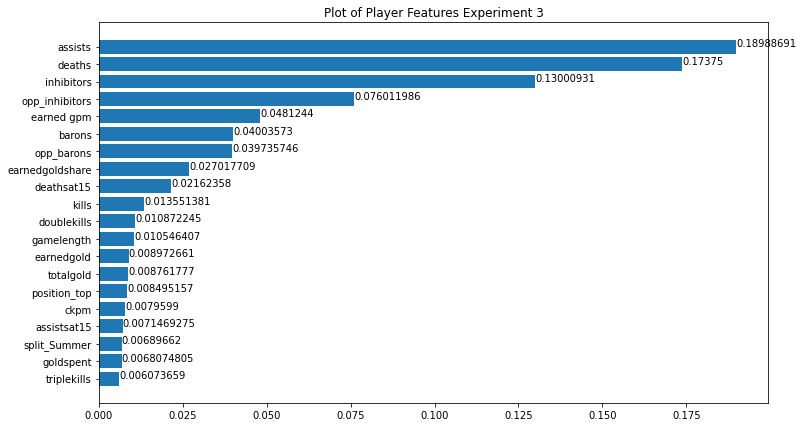

In [115]:
indices, s, top_40 = plot_40_features(model_3, scaled_columns,fig_name="Player Features Experiment 3")

In [116]:
top_40

['assists',
 'deaths',
 'inhibitors',
 'opp_inhibitors',
 'earned gpm',
 'barons',
 'opp_barons',
 'earnedgoldshare',
 'deathsat15',
 'kills',
 'doublekills',
 'gamelength',
 'earnedgold',
 'totalgold',
 'position_top',
 'ckpm',
 'assistsat15',
 'split_Summer',
 'goldspent',
 'triplekills',
 'champion_Ahri',
 'damageshare',
 'split_nan',
 'champion_Leona',
 'champion_Other',
 'goldat15',
 'minionkills',
 'opp_goldat15',
 'firstbloodvictim',
 'side_Blue',
 'visionscore',
 'csat15',
 'champion_Gnar',
 'cspm',
 'killsat10',
 'opp_assistsat10',
 'split_Split 1',
 'wardskilled',
 'patch',
 'damagemitigatedperminute']

In [117]:
player_data_copy["playername"].value_counts()

unknown player    1842
Keria              144
Gumayusi           144
Zeus               144
Oner               144
                  ... 
Noth                 1
Arhys                1
Flagged              1
Doubleshott          1
Darn Arne            1
Name: playername, Length: 3166, dtype: int64

In [118]:
playerNamesList = player_data_copy.playername.unique()

## Experiment model without opposite team features

In [119]:
# Split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Removing the categorical columns
cat_columns = ['gameid', 'league', 'split', 
'side', 'position', 'playername','playerid', 'teamname', 
'teamid', 'champion', 'ban1', 'ban2', 'ban3',
'ban4', 'ban5']

remove_columns = [
    "gameid", "playername", "playerid", 
    "teamname", "teamid", "ban1", "ban2", 
    "ban3", "ban4", "ban5", "year", "date", "participantid"
]

remaining_columns = ["split", "side", "position", "champion"]

X_train = X_train.drop(remove_columns, axis=1)

X_test = X_test.drop(remove_columns, axis=1)

replace_map = {}
count = 0
for k, v in X_train.champion.value_counts().items():
    if count < 10:
        replace_map[k] = k
    else:
        replace_map[k] = "Other"
    count += 1

# Replace champion map
X_train["champion"] = X_train.champion.replace(replace_map)
X_test["champion"] = X_test.champion.replace(replace_map)

# Remove team features
team_columns = ["teamkills", "teamdeaths", "team kpm"]
X_train = X_train.drop(team_columns, axis=1)

X_test = X_test.drop(team_columns, axis=1)

opp_columns = []
for c in X_train.columns:
    if "opp" in c:
        opp_columns.append(c)

X_train = X_train.drop(opp_columns, axis=1)

X_test = X_test.drop(opp_columns, axis=1)


# Feature Scaling
numerical_columns = X_train.describe().columns
categorical_columns = ["split", "side", "position", "champion"]

# Making a column transformer
ct_3 = make_column_transformer(
    (StandardScaler(), numerical_columns),
    (OneHotEncoder(), categorical_columns)
)

# Fitting on the training data
ct_3.fit(X_train)

# Transforming the data into scaled data
X_train_transformed = ct_3.transform(X_train)
X_test_transformed = ct_3.transform(X_test)

# Finding the columns after feature scaling
scaled_columns = []
for ct_col in ct_3.get_feature_names_out():
    scaled_columns.append(ct_col.split("__")[1])

In [120]:
model_4 = XGBClassifier(random_state=42)

# training the model
model_4.fit(X_train_transformed, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [121]:
y_train_preds_4 = model_4.predict(X_train_transformed)
accuracy_score(y_train, y_train_preds_4), f1_score(y_train, y_train_preds_4)

(0.9938020727494412, 0.9937888198757764)

In [122]:
y_preds_4 = model_4.predict(X_test_transformed)
accuracy_score(y_test, y_preds_4), f1_score(y_test, y_preds_4)

(0.968857955700061, 0.9692593149791886)

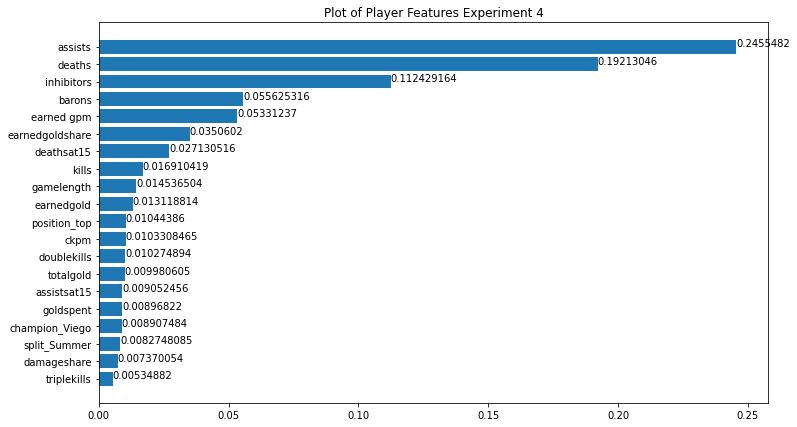

In [123]:
indices, s, top_40 = plot_40_features(model_4, scaled_columns,fig_name="Player Features Experiment 4")

In [124]:
pd.DataFrame(X_train_transformed, columns=scaled_columns)

,playoffs,game,patch,gamelength,kills,deaths,assists,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,ckpm,barons,inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,split_2022,split_Champ 1,split_Champ 2,split_Closing,split_Opening,split_Pro-Am,split_Split 1,split_Split 2,split_Spring,split_Summer,split_Winter,split_nan,side_Blue,side_Red,position_bot,position_jng,position_mid,position_sup,position_top,champion_Ahri,champion_Aphelios,champion_Gnar,champion_Gwen,champion_Jinx,champion_Lee Sin,champion_Leona,champion_Nautilus,champion_Other,champion_Viego,champion_Wukong
0,-0.461725,-0.52734,-0.172698,-1.588693,-1.055298,1.085318,-0.991297,-0.497384,-0.231395,-0.098357,-0.0434,-0.567749,-0.333272,-0.409814,-0.33346,0.776758,-0.344194,-0.395503,-0.442631,0.029312,0.874956,-0.309291,-0.855473,-0.630035,-0.449712,-0.131272,0.487841,-0.687350,-1.057714,-0.873400,-1.282551,-1.067499,-0.619190,-0.062891,-1.281899,-0.188155,0.165217,-0.715304,NaN,NaN,0.500361,0.279205,0.993400,0.726092,-0.296724,0.104639,0.633734,-0.565174,-0.660860,0.877415,-0.188855,0.604554,0.543027,-0.935721,-0.589487,0.289123,-0.717470,-0.184478,2.359138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.165794,0.60103,0.750148,2.327032,-0.314756,0.577847,1.706178,-0.497384,-0.231395,-0.098357,-0.0434,-0.567749,-0.333272,-0.409814,-0.33346,-0.377863,-0.344194,-0.395503,-1.051882,-1.356292,-1.616222,-0.275396,0.666916,2.846253,1.859399,0.378350,-0.152005,1.404558,2.939836,1.834224,-0.248857,-0.799758,-1.388384,-1.741188,-0.293313,-1.555212,-1.091462,-0.715304,NaN,NaN,-1.781263,-1.919277,-1.660094,-1.751494,0.056457,-0.095116,-0.063063,-0.565174,0.360867,-0.630051,-2.084522,-1.914876,-1.779454,-0.275713,0.052953,0.042138,-0.717470,-0.184478,-0.829450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.461725,-0.52734,1.672994,-0.846922,2.277142,-0.944567,-0.092139,2.504230,-0.231395,-0.098357,-0.0434,1.761343,3.000550,-0.409814,-0.33346,1.191317,-0.344194,-0.395503,0.371543,0.833115,0.105797,1.668423,0.501116,-0.983556,-1.031945,-0.640894,-0.518067,-0.877524,-0.788648,-0.680761,0.473409,0.716140,1.386104,0.517745,-0.060887,-0.207141,-1.204912,2.059138,NaN,NaN,0.083439,2.307885,0.565775,0.272449,1.409701,0.947086,-0.189753,3.505153,0.360867,-0.630051,1.766495,0.132161,0.022096,0.899398,0.533173,0.124466,2.976664,0.488102,0.233412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.461725,-0.52734,0.196440,-0.087419,-1.055298,-1.452038,1.031809,-0.497384,-0.231395,-0.098357,-0.0434,-0.567749,-0.333272,-0.409814,-0.33346,-1.159346,-0.344194,-0.395503,0.243602,0.326795,0.166199,-0.010303,1.191857,-0.276514,-0.273597,-1.150516,-1.256304,-0.687350,-0.519582,-0.544227,0.137935,0.172840,0.231941,-0.123548,0.132802,0.561828,0.749921,-0.500508,NaN,NaN,0.624986,1.097826,1.552089,1.144838,1.603021,1.125129,1.520566,-0.565174,-0.660860,-0.630051,0.796407,1.347869,1.129073,1.249748,0.216459,1.112407,-0.717470,-0.857058,-0.829450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.461725,0.60103,-0.910976,-1.562095,-1.055298,0.577847,-1.216086,-0.497384,-0.231395,-0.098357,-0.0434,-0.567749,-0.333272,-0.409814,-0.33346,-0.894594,-0.344194,-0.395503,-0.993248,-0.845236,-0.664145,-0.689708,-0.964193,-0.453275,-0.1